# Automated Essay Scoring (AES)

## Introduction

Automated Essay Scoring (AES) is a field of research in Natural Language Processing (NLP) that focuses on using algorithms and machine learning models to evaluate and score essays written by humans. This technology can be utilized in various educational contexts to support teaching and assessment.

In this exercise, we will explore how to use NLP techniques and machine learning to build an AES system. We will use a dataset of manually scored essays to train and test our model.

## Objectives of the Exercise

1. **Data Exploration**: Analyze the dataset to understand the distribution of scores and the characteristics of the essays.
2. **Define a baseline**: Using common ML approaches, try to achieve the best results
3. **Deep Learning Investigation**: Using a DL approach, try to improve the performances
4. **Transfer Learning**: Using our best model, try to fine-tune it using IELTS dataset

## 1. Data Exploration

The competition dataset comprises about 24000 student-written argumentative essays. Each essay was scored on a scale of 1 to 6. Your goal is to predict the score an essay received from its text.

[Link to the Holistic Scoring Rubric](https://storage.googleapis.com/kaggle-forum-message-attachments/2733927/20538/Rubric_%20Holistic%20Essay%20Scoring.pdf)

### File and Field Information

- **train.csv** - Essays and scores to be used as training data.
    - `essay_id` - The unique ID of the essay
    - `full_text` - The full essay response
    - `score` - Holistic score of the essay on a 1-6 scale
---
- **test.csv** - The essays to be used as test data. Contains the same fields as `train.csv`, aside from exclusion of `score`.
---
- **sample_submission.csv** - A submission file in the correct format.
    - `essay_id` - The unique ID of the essay
    - `score` - The predicted holistic score of the essay on a 1-6 scale


#### Overview of the Dataset
The dataset provided contains two main files: `train.csv` and `test.csv`. The train.csv file includes essays with their respective scores, while the test.csv file includes essays without scores, intended for prediction. Below, I outline the steps to understand and visualize the dataset, which is crucial for developing an effective model for automated essay scoring.

In [42]:
# loading all necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [43]:
# Load the training and test data
train_df = pd.read_csv('dataset/train.csv')
test_df = pd.read_csv('dataset/test.csv')

In [44]:
# Display the first few rows of the train data
train_df.head()

,essay_id,full_text,score
0,000d118,Many people have car where they live. The thin...,3
1,000fe60,I am a scientist at NASA that is discussing th...,3
2,001ab80,People always wish they had the same technolog...,4
3,001bdc0,"We all heard about Venus, the planet without a...",4
4,002ba53,"Dear, State Senator\n\nThis is a letter to arg...",3


In [45]:
# Display the first few rows of the test data
test_df.head()

,essay_id,full_text
0,000d118,Many people have car where they live. The thin...
1,000fe60,I am a scientist at NASA that is discussing th...
2,001ab80,People always wish they had the same technolog...


As you can see, the test dataset contains only three essays. In the following steps, we will concentrate more on the training dataset.

In [46]:
# Display summary statistics of the datasets
train_df.describe()

,score
count,17307.000000
mean,2.948402
std,1.044899
min,1.000000
25%,2.000000
50%,3.000000
75%,4.000000
max,6.000000


In [47]:
# Display information about the dataset
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17307 entries, 0 to 17306
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   essay_id   17307 non-null  object
 1   full_text  17307 non-null  object
 2   score      17307 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 405.8+ KB


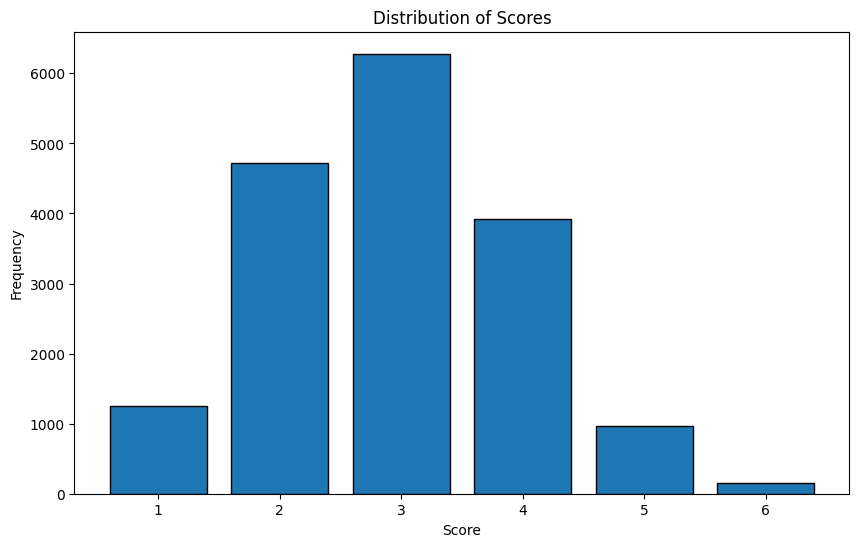

In [48]:
plt.figure(figsize=(10, 6))
plt.hist(train_df['score'], bins=range(1, 8), edgecolor='black', align='left', rwidth=0.8)
plt.title('Distribution of Scores')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.xticks(range(1, 7))
plt.show()

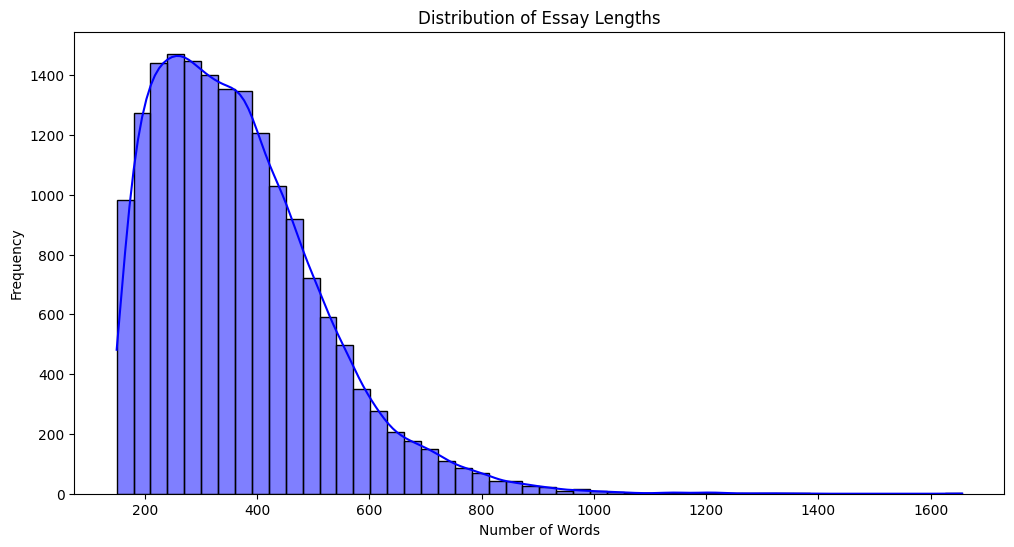

In [49]:
# Calculate essay lengths
train_df['essay_length'] = train_df['full_text'].apply(lambda x: len(x.split()))

# Plotting the essay length distribution
plt.figure(figsize=(12, 6))
sns.histplot(train_df['essay_length'], bins=50, kde=True, color='blue')
plt.title('Distribution of Essay Lengths')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.show()

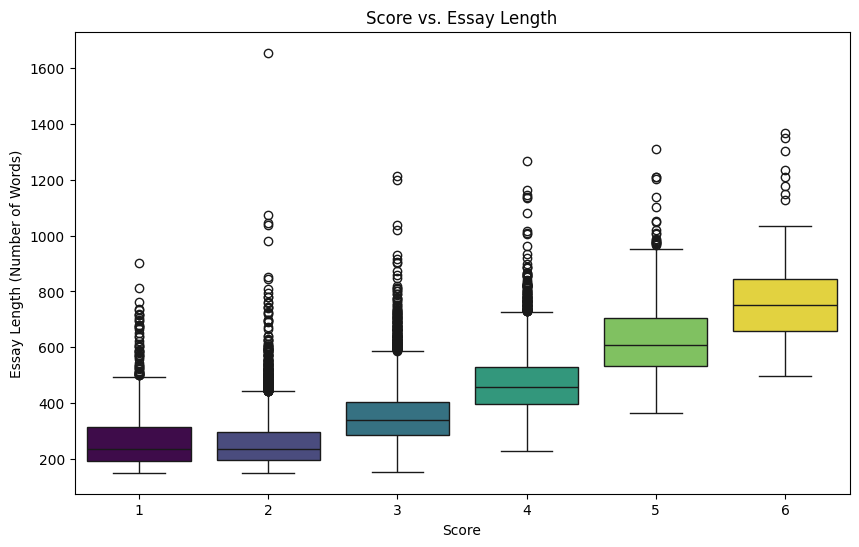

In [50]:
# Plotting score vs essay length
plt.figure(figsize=(10, 6))
sns.boxplot(x='score', y='essay_length', data=train_df, hue='score', palette='viridis', dodge=False)
plt.title('Score vs. Essay Length')
plt.xlabel('Score')
plt.ylabel('Essay Length (Number of Words)')
plt.legend([],[], frameon=False)  # Hide the legend
plt.show()

## 2. Baseline Models

### 2.1 Linear Regression

This experiment demonstrates the process of training a linear regression model on text data using TF-IDF vectorization. We'll split our dataset into training and validation sets, vectorize the text data, train the model, and evaluate its performance using various metrics. Finally, we'll predict scores on a test set and visualize the results.

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, median_absolute_error
from math import sqrt

In [52]:
X = train_df['full_text']
y = train_df['score']

In [53]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=99)

In [54]:
# TF-IDF to put the essays into matrixes (to use for linear regression)
vectorizer = TfidfVectorizer()

# Fit and transform the training data
X_train_vec = vectorizer.fit_transform(X_train)

# Transform the validation data
X_val_vec = vectorizer.transform(X_val)

In [55]:
# Linear regression
model = LinearRegression()

# Train the model
model.fit(X_train_vec, y_train)

# Predict the scores on the validation set
y_pred = model.predict(X_val_vec)

# Calculate mean_squared_error, r2_score, mean_absolute_error, median_absolute_error
rmse = sqrt(mean_squared_error(y_val, y_pred))
median = median_absolute_error(y_val, y_pred)
mean = mean_absolute_error(y_val, y_pred)
r2 = r2_score(y_val, y_pred)

print(f'Baseline Model RMSE: {rmse}')
print(f'Baseline Model median absolute error: {median}')
print(f'Baseline Model r2 score: {r2}')
print(f'Baseline Model mean absolute error: {mean}')

Baseline Model RMSE: 0.9720637724306531
Baseline Model median absolute error: 0.640941243341173
Baseline Model r2 score: 0.14089445600961592
Baseline Model mean absolute error: 0.7725909350653286


In [56]:
# Testing...

# Transform the test data using the same vectorizer
X_test_vec = vectorizer.transform(test_df['full_text'])

# Predict the scores on the test set
test_df['score'] = model.predict(X_test_vec)

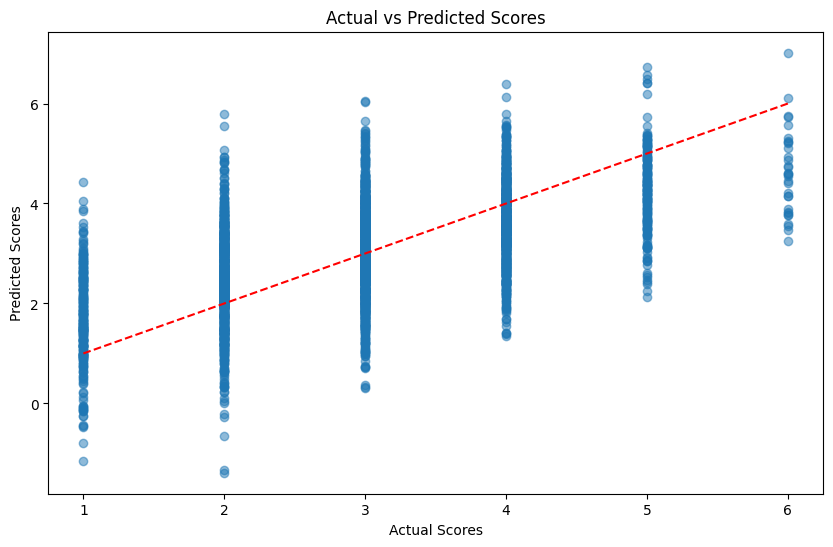

In [57]:
# Plotting the actual vs predicted scores
plt.figure(figsize=(10, 6))
plt.scatter(y_val, y_pred, alpha=0.5)
plt.plot([min(y_val), max(y_val)], [min(y_val), max(y_val)], 'r--')  # Ideal line where actual = predicted
plt.title('Actual vs Predicted Scores')
plt.xlabel('Actual Scores')
plt.ylabel('Predicted Scores')
plt.show()

#### Linear Regression Model Evaluation Metrics

| Metric                  | Value  |
|-------------------------|--------|
| RMSE                    | 0.972  |
| Median Absolute Error   | 0.641  |
| R-squared               | 0.141  |
| Mean Absolute Error     | 0.773  |

**Median Absolute Error**

   A value of 0.641 suggests that half of the predictions are within 0.641 units of the actual score.
 
**R-squared**

   An R² of 0.141 indicates that the model explains about 14.1% of the variance in the scores. This is relatively low, suggesting that the model does not capture a significant portion of the underlying patterns in the data. 

The median error suggests that half of the predictions are within 0.641 units of the actual score, which is reasonably good for a baseline model. 
The low R-squared value indicates that the model is not capturing a large portion of the variance in the scores, suggesting that there is significant room for improvement.

### 2.2 K-Nearest-Neighbors

We initially developed a basic k-NN model, serving as
our baseline, which utilized only the text and the score as
features.

In [58]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score
from tqdm import tqdm

In [59]:

# Prepare the training data
X_train = train_df['full_text']
y_train = train_df['score']

# Vectorize the text using TF-IDF
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)

# Initialize the KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)

# Fit the model
knn.fit(X_train_tfidf, y_train)

# Prepare the test data
X_test = test_df['full_text']
X_test_tfidf = vectorizer.transform(X_test)

# Predict the scores
predicted_scores = knn.predict(X_test_tfidf)

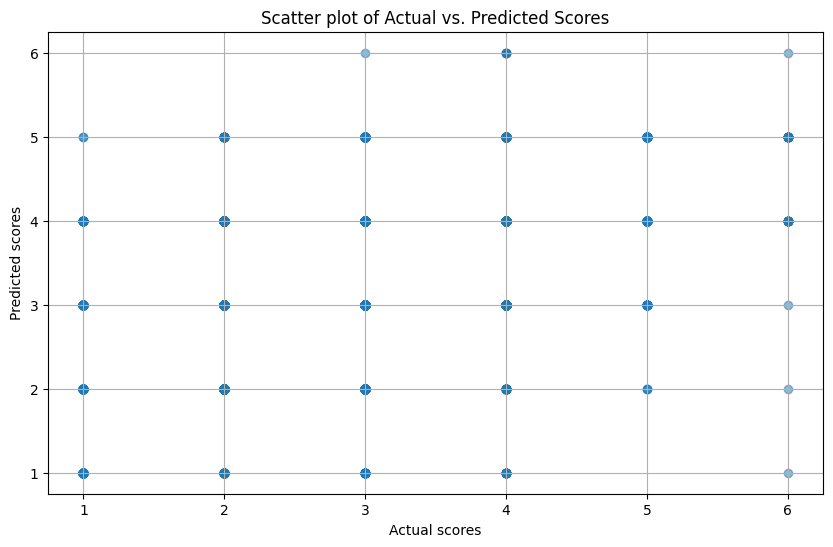

[[ 77  65  81  35   2   0]
 [ 56 180 408 295  26   0]
 [ 28 139 516 486  95   1]
 [ 15  38 217 380  95   5]
 [  0   3  38  83  59   0]
 [  1   1   1  15  20   1]]
              precision    recall  f1-score   support

           1       0.44      0.30      0.35       260
           2       0.42      0.19      0.26       965
           3       0.41      0.41      0.41      1265
           4       0.29      0.51      0.37       750
           5       0.20      0.32      0.25       183
           6       0.14      0.03      0.04        39

    accuracy                           0.35      3462
   macro avg       0.32      0.29      0.28      3462
weighted avg       0.38      0.35      0.34      3462

Validation Accuracy: 0.35


In [60]:
from sklearn.metrics import confusion_matrix, classification_report

X_train, X_val, y_train, y_val = train_test_split(X_train_tfidf, y_train, test_size=0.2, random_state=42)

# Fit the model on the training set
knn.fit(X_train, y_train)

# Predict on the validation set
y_val_pred = knn.predict(X_val)

# Plotting the scatterplot
plt.figure(figsize=(10, 6))
plt.scatter(y_val, y_val_pred, alpha=0.5)
plt.title('Scatter plot of Actual vs. Predicted Scores')
plt.xlabel('Actual scores')
plt.ylabel('Predicted scores')
plt.grid(True)
plt.show()

# Print out the confusion matrix
print(confusion_matrix(y_val, y_val_pred))

# Print out the classification report
print(classification_report(y_val, y_val_pred))

# Calculate and print the accuracy score
accuracy = accuracy_score(y_val, y_val_pred)
print(f'Validation Accuracy: {accuracy:.2f}')


This preliminary model achieved a validation accuracy of 0.35.

To enhance its performance, we expanded the feature set
to include the essay’s length and sentiment polarity. 

In [61]:
from textblob import TextBlob

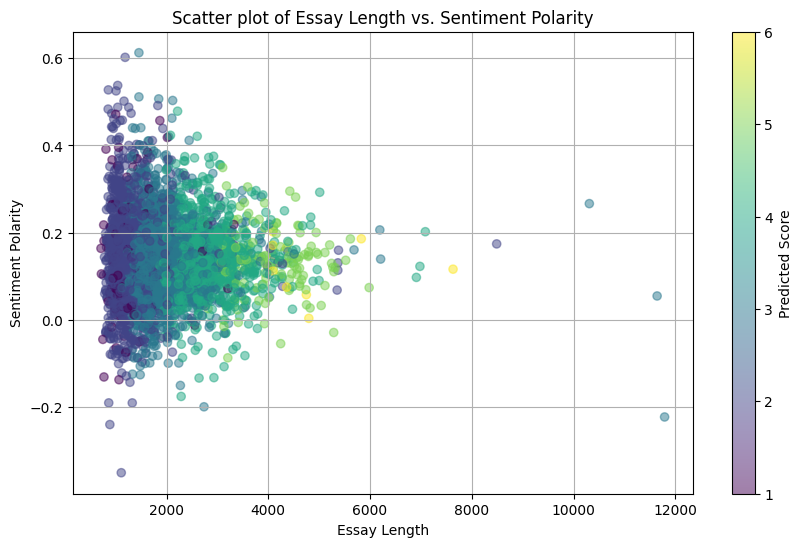

[[ 13 157  75  12   3   0]
 [ 64 527 310  55   7   2]
 [ 24 295 703 228  13   2]
 [  6  37 279 374  51   3]
 [  2   5  24 103  48   1]
 [  0   2   3  16  16   2]]
              precision    recall  f1-score   support

           1       0.12      0.05      0.07       260
           2       0.52      0.55      0.53       965
           3       0.50      0.56      0.53      1265
           4       0.47      0.50      0.49       750
           5       0.35      0.26      0.30       183
           6       0.20      0.05      0.08        39

    accuracy                           0.48      3462
   macro avg       0.36      0.33      0.33      3462
weighted avg       0.46      0.48      0.47      3462

Validation Accuracy: 0.48


In [62]:
# Load the training data
train_data = pd.read_csv('dataset/train.csv')

# Calculate essay length and sentiment polarity for each essay
train_data['essay_length'] = train_data['full_text'].apply(len)
train_data['sentiment_polarity'] = train_data['full_text'].apply(lambda x: TextBlob(x).sentiment.polarity)

# Prepare the features and target variable
X = train_data[['essay_length', 'sentiment_polarity']]
y = train_data['score']

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the KNN model on the training set
knn.fit(X_train, y_train)

# Predict on the validation set
y_val_pred = knn.predict(X_val)

# Plotting the scatterplot with clusters
plt.figure(figsize=(10, 6))
plt.scatter(X_val['essay_length'], X_val['sentiment_polarity'], c=y_val_pred, alpha=0.5, cmap='viridis')
plt.colorbar(label='Predicted Score')
plt.title('Scatter plot of Essay Length vs. Sentiment Polarity')
plt.xlabel('Essay Length')
plt.ylabel('Sentiment Polarity')
plt.grid(True)
plt.show()

# Print out the confusion matrix
print(confusion_matrix(y_val, y_val_pred))

# Print out the classification report
print(classification_report(y_val, y_val_pred))

# Calculate and print the accuracy score
accuracy = accuracy_score(y_val, y_val_pred)
print(f'Validation Accuracy: {accuracy:.2f}')

This integration led to a notable improvement, raising the validation accuracy to 0.48.

In [63]:
from mpl_toolkits.mplot3d import Axes3D

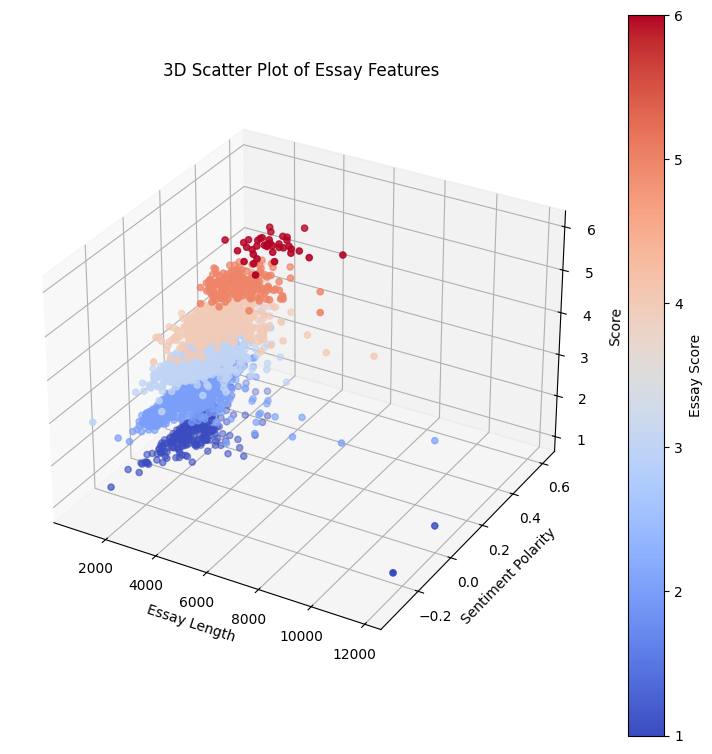

In [64]:

# Create a figure with a 2x2 grid of subplots
fig = plt.figure(figsize=(15, 15))

# 3D Scatter Plot
ax1 = fig.add_subplot(221, projection='3d')
scatter = ax1.scatter(X_val['essay_length'], X_val['sentiment_polarity'], y_val, c=y_val, cmap='coolwarm')
ax1.set_xlabel('Essay Length')
ax1.set_ylabel('Sentiment Polarity')
ax1.set_zlabel('Score')
ax1.set_title('3D Scatter Plot of Essay Features')
color_bar = plt.colorbar(scatter, ax=ax1)
color_bar.set_label('Essay Score')

# Adjust layout to prevent overlap
plt.tight_layout()

# Display the figure with subplots
plt.show()

However, this inclusion introduces certain biases into the model.

Subsequently, we tried to optimize the number of neighbors (k) in the k-NN algorithm

In [65]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

In [66]:
# Cross validation for the k
from sklearn.model_selection import cross_val_score

# List of different values of k
k_values = range(1, 31)

# Empty list to store scores
cross_val_scores = []

# Perform 10-fold cross-validation
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train_scaled, y_train, cv=10, scoring='accuracy')
    cross_val_scores.append(scores.mean())

# Find the optimal k value
optimal_k = k_values[cross_val_scores.index(max(cross_val_scores))]
print(f'The optimal number of neighbors is {optimal_k}')

The optimal number of neighbors is 27


Employing crossvalidation, we determined the optimal k value to be 27

In [67]:
# Weighted voting
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=optimal_k, weights='distance')
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=27, weights='distance')

In [68]:
knn.fit(X_train_scaled, y_train)

# Predict on the validation set
y_val_pred = knn.predict(X_val_scaled)

# Evaluate the model
print(confusion_matrix(y_val, y_val_pred))
print(classification_report(y_val, y_val_pred))
accuracy = accuracy_score(y_val, y_val_pred)
print(f'Validation Accuracy: {accuracy:.2f}')

[[  0 149  98  12   1   0]
 [  9 558 330  57  10   1]
 [  3 191 799 260  12   0]
 [  2   9 213 467  54   5]
 [  0   2   7 101  71   2]
 [  1   0   0   4  31   3]]
              precision    recall  f1-score   support

           1       0.00      0.00      0.00       260
           2       0.61      0.58      0.60       965
           3       0.55      0.63      0.59      1265
           4       0.52      0.62      0.57       750
           5       0.40      0.39      0.39       183
           6       0.27      0.08      0.12        39

    accuracy                           0.55      3462
   macro avg       0.39      0.38      0.38      3462
weighted avg       0.51      0.55      0.53      3462

Validation Accuracy: 0.55


resulting in an enhanced validation accuracy of 0.55

In our pursuit of further improvement, we introduced additional features such as word count, unique word count, average word length, sentence count, average sentence length,
and lexical diversity. 

In [71]:
import pandas as pd
from textblob import TextBlob
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.neighbors import KNeighborsClassifier
import nltk
import numpy as np
import textstat

nltk.download('punkt')

[nltk_data] Downloading package punkt to /home/davide/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [73]:


# Load the training data
train_data = pd.read_csv('dataset/train.csv')

# Calculate essay length and sentiment polarity for each essay
train_data['essay_length'] = train_data['full_text'].apply(len)
train_data['sentiment_polarity'] = train_data['full_text'].apply(lambda x: TextBlob(x).sentiment.polarity)

# Calculate additional features
train_data['word_count'] = train_data['full_text'].apply(lambda x: len(x.split()))
train_data['unique_word_count'] = train_data['full_text'].apply(lambda x: len(set(x.split())))
train_data['avg_word_length'] = train_data['full_text'].apply(lambda x: np.mean([len(word) for word in x.split()]))
train_data['sentence_count'] = train_data['full_text'].apply(lambda x: len(nltk.sent_tokenize(x)))
train_data['avg_sentence_length'] = train_data['full_text'].apply(lambda x: np.mean([len(sentence.split()) for sentence in nltk.sent_tokenize(x)]))
train_data['lexical_diversity'] = train_data['unique_word_count'] / train_data['word_count']

# Calculate Flesch-Kincaid grade level for each essay
train_data['flesch_kincaid_grade'] = train_data['full_text'].apply(textstat.flesch_kincaid_grade)

# Prepare the features and target variable
feature_columns = [
    'essay_length', 'sentiment_polarity', 'word_count', 'unique_word_count',
    'avg_word_length', 'sentence_count', 'avg_sentence_length', 'lexical_diversity',
    'flesch_kincaid_grade'
]
X = train_data[feature_columns]
y = train_data['score']

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit the KNN model
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

# Predict on the validation set
y_val_pred = knn.predict(X_val)

# Evaluate the model
print(confusion_matrix(y_val, y_val_pred))
print(classification_report(y_val, y_val_pred))
accuracy = accuracy_score(y_val, y_val_pred)
print(f'Validation Accuracy: {accuracy:.2f}')


[[ 31 143  74  10   2   0]
 [ 63 547 299  47   7   2]
 [ 29 279 717 232   8   0]
 [  6  22 263 401  54   4]
 [  1   1  16 101  61   3]
 [  0   0   1  10  25   3]]
              precision    recall  f1-score   support

           1       0.24      0.12      0.16       260
           2       0.55      0.57      0.56       965
           3       0.52      0.57      0.54      1265
           4       0.50      0.53      0.52       750
           5       0.39      0.33      0.36       183
           6       0.25      0.08      0.12        39

    accuracy                           0.51      3462
   macro avg       0.41      0.37      0.38      3462
weighted avg       0.49      0.51      0.50      3462

Validation Accuracy: 0.51


Their inclusion led to a marginal decrease in validation accuracy, dropping to 0.51

[[ 33 148  69  10   0   0]
 [ 68 528 311  54   4   0]
 [ 30 281 722 223   9   0]
 [  4  27 292 367  56   4]
 [  0   2  28  88  58   7]
 [  0   0   5   5  25   4]]
              precision    recall  f1-score   support

           1       0.24      0.13      0.17       260
           2       0.54      0.55      0.54       965
           3       0.51      0.57      0.54      1265
           4       0.49      0.49      0.49       750
           5       0.38      0.32      0.35       183
           6       0.27      0.10      0.15        39

    accuracy                           0.49      3462
   macro avg       0.40      0.36      0.37      3462
weighted avg       0.48      0.49      0.49      3462

Validation Accuracy: 0.49
Cross-validation scores: [0.50895436 0.52686308 0.51054608 0.52325917 0.51025715]
Average cross-validation score: 0.52


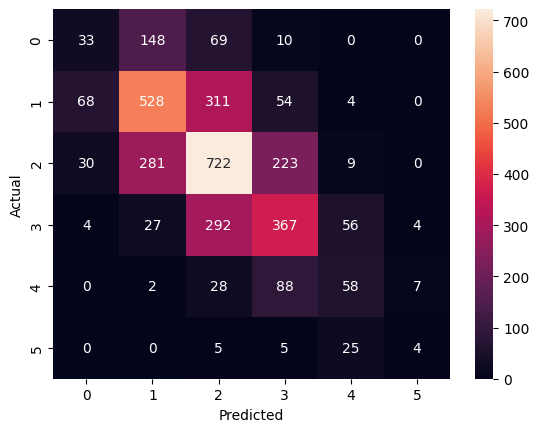

{'mean_fit_time': array([0.0159888 , 0.01600981, 0.01604958, 0.01606927, 0.01653931,
       0.01711166, 0.01593807, 0.01590531, 0.01583674, 0.0161556 ,
       0.01623981, 0.01630397, 0.01626711, 0.01688786, 0.01636295,
       0.01621065, 0.01646252, 0.01618531, 0.01595459, 0.01620429,
       0.01592963, 0.01665967, 0.015716  , 0.01589386, 0.01621079,
       0.01633453, 0.01627128, 0.01634619, 0.01607633, 0.01626706]), 'std_fit_time': array([2.43863013e-04, 3.33196204e-04, 1.59367931e-04, 2.88258616e-04,
       6.36760532e-04, 1.43580007e-03, 2.32151280e-04, 1.12080828e-04,
       1.94335230e-04, 3.21779544e-04, 3.79902527e-04, 6.32341330e-04,
       1.73020374e-04, 2.05198553e-03, 4.73726447e-04, 3.15043467e-04,
       2.87620881e-04, 2.19544430e-04, 8.03978559e-05, 2.29496133e-04,
       1.37984103e-04, 1.91634986e-03, 1.81598411e-04, 3.36739789e-04,
       5.79046747e-04, 4.79194666e-04, 2.48588411e-04, 6.54596490e-04,
       1.10103703e-04, 1.42704862e-04]), 'mean_score_time': array

In [75]:
import pandas as pd
from textblob import TextBlob
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report, accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
import nltk
import numpy as np
import textstat
import matplotlib.pyplot as plt

def plot_confusion_matrix(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt='d')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

train_data = pd.read_csv('dataset/train.csv')

train_data['essay_length'] = train_data['full_text'].apply(len)
train_data['sentiment_polarity'] = train_data['full_text'].apply(lambda x: TextBlob(x).sentiment.polarity)
train_data['word_count'] = train_data['full_text'].apply(lambda x: len(x.split()))
train_data['unique_word_count'] = train_data['full_text'].apply(lambda x: len(set(x.split())))
train_data['avg_word_length'] = train_data['full_text'].apply(lambda x: np.mean([len(word) for word in x.split()]))
train_data['sentence_count'] = train_data['full_text'].apply(lambda x: len(nltk.sent_tokenize(x)))
train_data['avg_sentence_length'] = train_data['full_text'].apply(lambda x: np.mean([len(sentence.split()) for sentence in nltk.sent_tokenize(x)]))
train_data['lexical_diversity'] = train_data['unique_word_count'] / train_data['word_count']
train_data['flesch_kincaid_grade'] = train_data['full_text'].apply(textstat.flesch_kincaid_grade)

feature_columns = [
    'essay_length', 'sentiment_polarity', 'word_count', 'unique_word_count',
    'avg_word_length', 'sentence_count', 'avg_sentence_length', 'lexical_diversity',
    'flesch_kincaid_grade'
]
X = train_data[feature_columns]
y = train_data['score']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

knn = make_pipeline(StandardScaler(), KNeighborsClassifier())
knn.fit(X_train, y_train)

y_val_pred = knn.predict(X_val)

print(confusion_matrix(y_val, y_val_pred))
print(classification_report(y_val, y_val_pred))
accuracy = accuracy_score(y_val, y_val_pred)
print(f'Validation Accuracy: {accuracy:.2f}')

# Cross-validation
cv_scores = cross_val_score(knn, X, y, cv=5)
print(f'Cross-validation scores: {cv_scores}')
print(f'Average cross-validation score: {np.mean(cv_scores):.2f}')

# Plot confusion matrix
plot_confusion_matrix(y_val, y_val_pred)

plt.show()

from sklearn.model_selection import GridSearchCV

# Define the parameter values that should be searched
k_range = list(range(1, 31))

# Create a parameter grid: map the parameter names to the values that should be searched
param_grid = dict(n_neighbors=k_range)

# Instantiate the grid
grid = GridSearchCV(KNeighborsClassifier(), param_grid, cv=10, scoring='accuracy')

# Fit the grid with data
grid.fit(X, y)

# View the complete results
print(grid.cv_results_)

# Examine the best model
print(grid.best_score_)
print(grid.best_params_)

To leverage the strength of ensemble methods, we assembled a trio of k-NN models with varying numbers of
neighbors (10, 20, 30). 

In [76]:
from sklearn.ensemble import VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# Define three KNN models with different n_neighbors
knn1 = make_pipeline(StandardScaler(), KNeighborsClassifier(n_neighbors=10))
knn2 = make_pipeline(StandardScaler(), KNeighborsClassifier(n_neighbors=20))
knn3 = make_pipeline(StandardScaler(), KNeighborsClassifier(n_neighbors=30))

# Create an ensemble of the three KNN models
ensemble = VotingClassifier(estimators=[('knn1', knn1), ('knn2', knn2), ('knn3', knn3)], voting='hard')

# Fit the ensemble model
ensemble.fit(X_train, y_train)

# Predict on the validation set
y_val_pred = ensemble.predict(X_val)

# Evaluate the model
print(classification_report(y_val, y_val_pred))
accuracy = accuracy_score(y_val, y_val_pred)
print(f'Validation Accuracy: {accuracy:.2f}')

# Cross-validation
cv_scores = cross_val_score(ensemble, X, y, cv=5)
print(f'Cross-validation scores: {cv_scores}')
print(f'Average cross-validation score: {np.mean(cv_scores):.2f}')


              precision    recall  f1-score   support

           1       0.42      0.07      0.11       260
           2       0.62      0.60      0.61       965
           3       0.57      0.66      0.61      1265
           4       0.54      0.60      0.57       750
           5       0.41      0.37      0.39       183
           6       0.43      0.08      0.13        39

    accuracy                           0.57      3462
   macro avg       0.50      0.40      0.40      3462
weighted avg       0.56      0.57      0.55      3462

Validation Accuracy: 0.57
Cross-validation scores: [0.56556904 0.57712305 0.55388616 0.57382259 0.56082057]
Average cross-validation score: 0.57


This ensemble model yielded a substantial boost in validation accuracy, reaching 0.57

In [77]:
from sklearn.ensemble import GradientBoostingClassifier

# Initialize the Gradient Boosting model
gb = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=42)

# Fit the model
gb.fit(X_train, y_train)

# Predict on the validation set
y_val_pred = gb.predict(X_val)

# Evaluate the model
print(classification_report(y_val, y_val_pred))
accuracy = accuracy_score(y_val, y_val_pred)
print(f'Validation Accuracy: {accuracy:.2f}')

              precision    recall  f1-score   support

           1       0.32      0.05      0.09       260
           2       0.62      0.62      0.62       965
           3       0.46      0.71      0.56      1265
           4       0.54      0.37      0.44       750
           5       0.00      0.00      0.00       183
           6       0.00      0.00      0.00        39

    accuracy                           0.51      3462
   macro avg       0.32      0.29      0.28      3462
weighted avg       0.48      0.51      0.48      3462

Validation Accuracy: 0.51


/media/davide/Volume/Embeddings/.venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/media/davide/Volume/Embeddings/.venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/media/davide/Volume/Embeddings/.venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.

In [78]:
from sklearn.svm import SVC

# Initialize the SVM model
svm = SVC(kernel='rbf', random_state=42)

# Fit the model
svm.fit(X_train, y_train)

# Predict on the validation set
y_val_pred = svm.predict(X_val)

# Evaluate the model
print(classification_report(y_val, y_val_pred))
accuracy = accuracy_score(y_val, y_val_pred)
print(f'Validation Accuracy: {accuracy:.2f}')

              precision    recall  f1-score   support

           1       0.00      0.00      0.00       260
           2       0.65      0.56      0.60       965
           3       0.55      0.67      0.61      1265
           4       0.51      0.66      0.58       750
           5       0.36      0.23      0.28       183
           6       1.00      0.03      0.05        39

    accuracy                           0.56      3462
   macro avg       0.51      0.36      0.35      3462
weighted avg       0.52      0.56      0.53      3462

Validation Accuracy: 0.56


/media/davide/Volume/Embeddings/.venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/media/davide/Volume/Embeddings/.venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/media/davide/Volume/Embeddings/.venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.

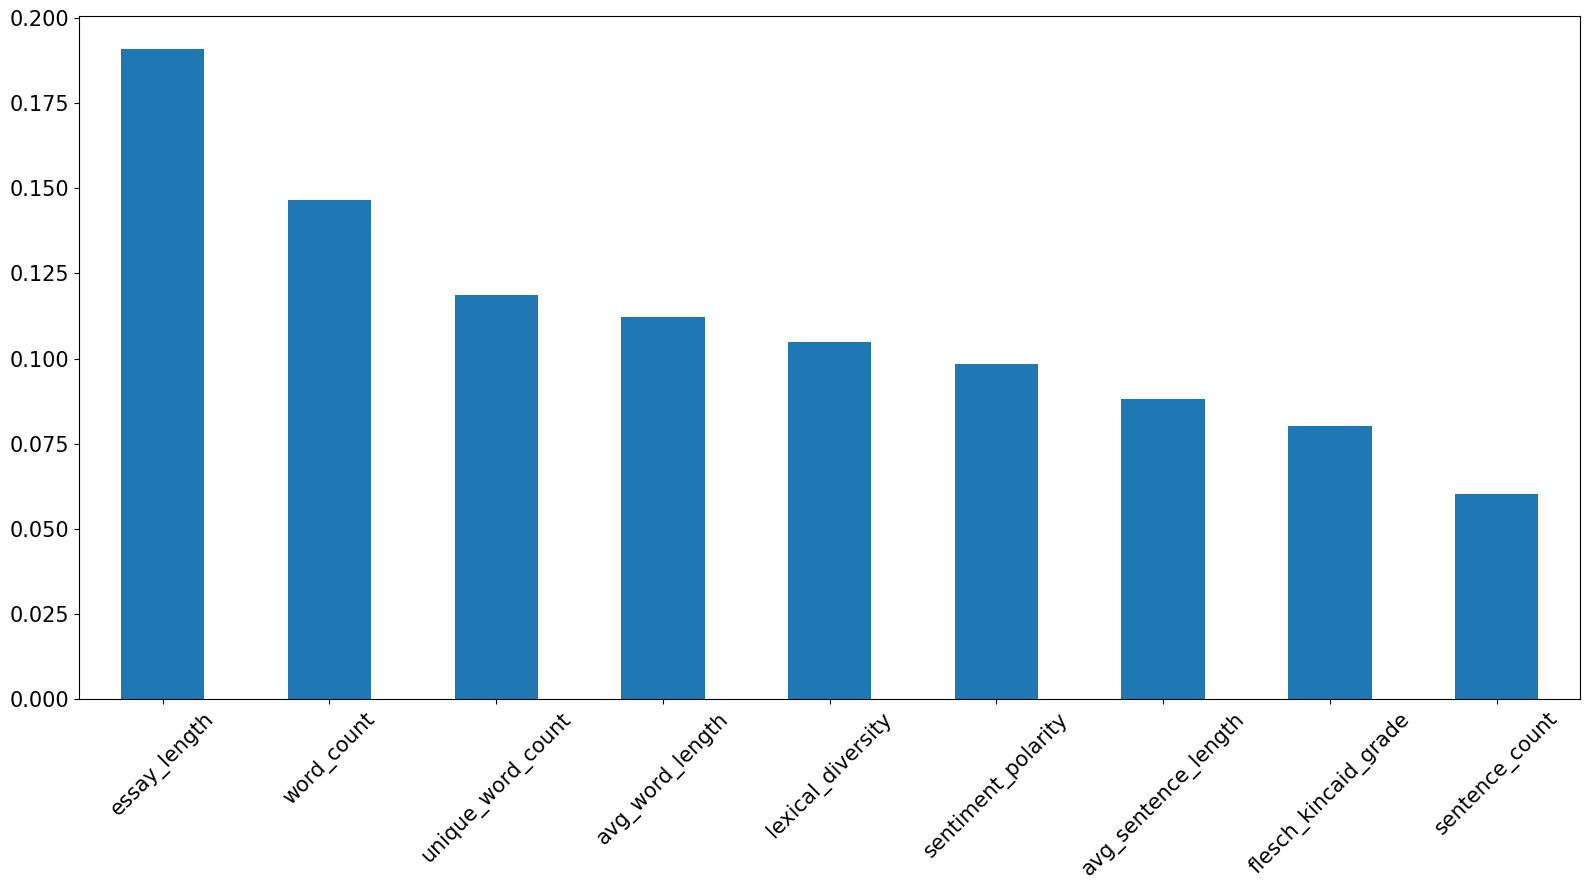

In [81]:
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
from textblob import TextBlob
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report, accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
import nltk
import textstat
import numpy as np
import matplotlib.pyplot as plt
# Load the training data
train_data = pd.read_csv('dataset/train.csv')

# Calculate essay length and sentiment polarity for each essay
train_data['essay_length'] = train_data['full_text'].apply(len)
train_data['sentiment_polarity'] = train_data['full_text'].apply(lambda x: TextBlob(x).sentiment.polarity)

# Calculate additional features
train_data['word_count'] = train_data['full_text'].apply(lambda x: len(x.split()))
train_data['unique_word_count'] = train_data['full_text'].apply(lambda x: len(set(x.split())))
train_data['avg_word_length'] = train_data['full_text'].apply(lambda x: np.mean([len(word) for word in x.split()]))
train_data['sentence_count'] = train_data['full_text'].apply(lambda x: len(nltk.sent_tokenize(x)))
train_data['avg_sentence_length'] = train_data['full_text'].apply(lambda x: np.mean([len(sentence.split()) for sentence in nltk.sent_tokenize(x)]))
train_data['lexical_diversity'] = train_data['unique_word_count'] / train_data['word_count']

# Calculate Flesch-Kincaid grade level for each essay
train_data['flesch_kincaid_grade'] = train_data['full_text'].apply(textstat.flesch_kincaid_grade)

# Prepare the features and target variable
feature_columns = [
    'essay_length', 'sentiment_polarity', 'word_count', 'unique_word_count',
    'avg_word_length', 'sentence_count', 'avg_sentence_length', 'lexical_diversity',
    'flesch_kincaid_grade'
]
X = train_data[feature_columns]
y = train_data['score']

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest model
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model
rf.fit(X_train, y_train)

# Get feature importances
importances = rf.feature_importances_

# Convert the importances into one-dimensional 1darray with corresponding df column names as axis labels
f_importances = pd.Series(importances, X.columns)

# Sort the array in descending order of the importances
f_importances.sort_values(ascending=False, inplace=True)

# Make the bar Plot from f_importances 
f_importances.plot(x='Features', y='Importance', kind='bar', figsize=(16,9), rot=45, fontsize=15)

# Show the plot
plt.tight_layout()
plt.show()

In [82]:
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
from textblob import TextBlob
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report, accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
import nltk
import textstat
import numpy as np
import matplotlib.pyplot as plt
# Load the training data
train_data = pd.read_csv('dataset/train.csv')

# Calculate essay length and sentiment polarity for each essay
train_data['essay_length'] = train_data['full_text'].apply(len)
#train_data['sentiment_polarity'] = train_data['full_text'].apply(lambda x: TextBlob(x).sentiment.polarity)

# Calculate additional features
#train_data['word_count'] = train_data['full_text'].apply(lambda x: len(x.split()))
train_data['unique_word_count'] = train_data['full_text'].apply(lambda x: len(set(x.split())))
train_data['avg_word_length'] = train_data['full_text'].apply(lambda x: np.mean([len(word) for word in x.split()]))
#train_data['sentence_count'] = train_data['full_text'].apply(lambda x: len(nltk.sent_tokenize(x)))
#train_data['avg_sentence_length'] = train_data['full_text'].apply(lambda x: np.mean([len(sentence.split()) for sentence in nltk.sent_tokenize(x)]))
#train_data['lexical_diversity'] = train_data['unique_word_count'] / train_data['word_count']

# Calculate Flesch-Kincaid grade level for each essay
#train_data['flesch_kincaid_grade'] = train_data['full_text'].apply(textstat.flesch_kincaid_grade)

# Prepare the features and target variable
feature_columns = [
    'essay_length',
    'avg_word_length',
    'unique_word_count'
]
X = train_data[feature_columns]
y = train_data['score']

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)

knn = make_pipeline(StandardScaler(), KNeighborsClassifier(n_neighbors=30))
knn.fit(X_train, y_train)

y_val_pred = knn.predict(X_val)

print(classification_report(y_val, y_val_pred))
accuracy = accuracy_score(y_val, y_val_pred)
print(f'Validation Accuracy: {accuracy:.2f}')

# Cross-validation
cv_scores = cross_val_score(knn, X, y, cv=5)
print(f'Cross-validation scores: {cv_scores}')
print(f'Average cross-validation score: {np.mean(cv_scores):.2f}')

plt.show()

              precision    recall  f1-score   support

           1       0.38      0.02      0.03       392
           2       0.63      0.60      0.61      1421
           3       0.57      0.65      0.61      1908
           4       0.52      0.64      0.58      1123
           5       0.46      0.39      0.42       296
           6       0.31      0.08      0.12        53

    accuracy                           0.57      5193
   macro avg       0.48      0.40      0.39      5193
weighted avg       0.55      0.57      0.54      5193

Validation Accuracy: 0.57
Cross-validation scores: [0.55632582 0.5745234  0.55822017 0.57613407 0.56804392]
Average cross-validation score: 0.57


In [83]:
import pandas as pd
from textblob import TextBlob
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.ensemble import GradientBoostingClassifier
import nltk
import numpy as np
import textstat

# Load the training data
train_data = pd.read_csv('dataset/train.csv')

# Calculate essay length and sentiment polarity for each essay
train_data['essay_length'] = train_data['full_text'].apply(len)
train_data['sentiment_polarity'] = train_data['full_text'].apply(lambda x: TextBlob(x).sentiment.polarity)

# Calculate additional features
train_data['word_count'] = train_data['full_text'].apply(lambda x: len(x.split()))
train_data['unique_word_count'] = train_data['full_text'].apply(lambda x: len(set(x.split())))
train_data['avg_word_length'] = train_data['full_text'].apply(lambda x: np.mean([len(word) for word in x.split()]))
train_data['sentence_count'] = train_data['full_text'].apply(lambda x: len(nltk.sent_tokenize(x)))
train_data['avg_sentence_length'] = train_data['full_text'].apply(lambda x: np.mean([len(sentence.split()) for sentence in nltk.sent_tokenize(x)]))
train_data['lexical_diversity'] = train_data['unique_word_count'] / train_data['word_count']

# Calculate Flesch-Kincaid grade level for each essay
train_data['flesch_kincaid_grade'] = train_data['full_text'].apply(textstat.flesch_kincaid_grade)

# Prepare the features and target variable
feature_columns = [
    'essay_length', 'sentiment_polarity', 'word_count', 'unique_word_count',
    'avg_word_length', 'sentence_count', 'avg_sentence_length', 'lexical_diversity',
    'flesch_kincaid_grade'
]
X = train_data[feature_columns]
y = train_data['score']

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit the Gradient Boosting model
gb = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=42)
gb.fit(X_train, y_train)

# Predict on the validation set
y_val_pred = gb.predict(X_val)

# Evaluate the model
print(classification_report(y_val, y_val_pred))
accuracy = accuracy_score(y_val, y_val_pred)
print(f'Validation Accuracy: {accuracy:.2f}')

              precision    recall  f1-score   support

           1       0.32      0.05      0.09       260
           2       0.62      0.62      0.62       965
           3       0.46      0.71      0.56      1265
           4       0.54      0.37      0.44       750
           5       0.00      0.00      0.00       183
           6       0.00      0.00      0.00        39

    accuracy                           0.51      3462
   macro avg       0.32      0.29      0.28      3462
weighted avg       0.48      0.51      0.48      3462

Validation Accuracy: 0.51


/media/davide/Volume/Embeddings/.venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/media/davide/Volume/Embeddings/.venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/media/davide/Volume/Embeddings/.venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.

## 3. Deep Learning Approach

### 3.1 Classification Approach

Our initial approach was to address the problem as a classification task

In [148]:
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from transformers import AutoTokenizer, TFAutoModelForSequenceClassification, TFDebertaV2Model, BertTokenizer, TFBertModel
from keras.metrics import MeanAbsoluteError, RootMeanSquaredError

import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [164]:
NUM_CLASSES = 6
BATCH_SIZE = 32
MAX_LENGTH = 512
EARLY_STOPPING_PATIENCE = 3
EPOCHS = 5
MODEL_NAME = "bert-base-cased"
BASE_PATH = "dataset/"
LEARNING_AGENCY_DS_PATH = BASE_PATH + "train.csv"
CHECKPOINT_WEIGHTS_PATH = "models/model_01"

In [150]:
# Load and split data
df_learning_agency = pd.read_csv(LEARNING_AGENCY_DS_PATH)

train_data, test_data = train_test_split(df_learning_agency, test_size=0.3, random_state=42, stratify=df_learning_agency["score"])
test_data, val_data = train_test_split(test_data, test_size=0.5, random_state=42, stratify=test_data["score"])

In [151]:
# tokenization
# tokenizer = AutoTokenizer.from_pretrained(MODEL_NAME)
tokenizer = BertTokenizer.from_pretrained(MODEL_NAME)

def create_encodings(data, type="ielts"):
    if type == "ielts":
        text = data["Essay"]
    elif type ==  "base":
        text = data["full_text"]
    
    return tokenizer(
        text.tolist(), 
        truncation=True,
        padding=True, 
        max_length=MAX_LENGTH,
        return_tensors='tf'
    )

train_encodings = create_encodings(train_data, "base")
val_encodings = create_encodings(val_data, "base")
test_encodings = create_encodings(test_data, "base")

input_ids_train = train_encodings['input_ids']
input_ids_val = val_encodings['input_ids']
input_ids_test = test_encodings['input_ids']

In [152]:
model = TFBertModel.from_pretrained(MODEL_NAME)

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.weight', 'cls.predictions.bias']
- This IS expected if you are initializing TFBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions w

In [153]:
# Set BERT layers as non-trainable
for layer in model.layers:
    layer.trainable = False

We augmented the Bert model with a classification head, consisting of two fully connected layers comprising 128 and 64 neurons, respectively. ReLU activation
function was applied, followed by a final layer with a single
neuron and softmax activation

In [154]:
# Create a custom head
classification_head = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(6, activation='softmax')
])

In [155]:
# Combine BERT and Classification Head
input_ids = tf.keras.layers.Input(shape=(MAX_LENGTH,), dtype=tf.int32)
bert_output = model(input_ids)[0]  # BERT's output
pooler_output = bert_output[:, 0, :]     # Pooler output
classification_output = classification_head(pooler_output)  # Custom regression head

bert_text_model = tf.keras.models.Model(inputs=input_ids, outputs=classification_output)

In [156]:
# Compile the model, specifying the loss and metrics
bert_text_model.compile(
    optimizer=tf.keras.optimizers.Adam(5e-4),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=['accuracy'],
)

In [157]:
# Print model summary
bert_text_model.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_8 (InputLayer)        [(None, 512)]             0         
                                                                 
 tf_bert_model_4 (TFBertMod  TFBaseModelOutputWithPo   108310272 
 el)                         olingAndCrossAttentions             
                             (last_hidden_state=(Non             
                             e, 512, 768),                       
                              pooler_output=(None, 7             
                             68),                                
                              past_key_values=None,              
                             hidden_states=None, att             
                             entions=None, cross_att             
                             entions=None)                       
                                                           

In [158]:
earlystop_callback = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',  # Monitor validation loss
    min_delta=0,         # Minimum change in validation loss to be considered an improvement
    patience=EARLY_STOPPING_PATIENCE,          # Number of epochs with no improvement after which training will stop
    verbose=0,           # Verbosity mode (0 for silent)
    mode='auto'          # Automatically infer the direction of loss improvement
)

checkpoint_callback_bert = tf.keras.callbacks.ModelCheckpoint(
    filepath=CHECKPOINT_WEIGHTS_PATH,  # Specify the path to save the best model
    monitor='val_loss',       # Monitor validation loss
    save_best_only=True,      # Save only the best model (lowest val_loss)
    mode='min',               # Consider lower values as better
    verbose=1                 # Verbosity mode (0 for silent)
)

&#x26a0;&#xfe0f; **This code could take long to execute**

In [159]:
history_bert = bert_text_model.fit(
    input_ids_train, 
    train_data['score'] - 1,
    epochs=3,
    batch_size=32,
    validation_data=(input_ids_val, val_data['score'] - 1),
    callbacks=[checkpoint_callback_bert, earlystop_callback]
)

Epoch 1/3


379/379 [==============================] - ETA: 0s - loss: 1.2156 - accuracy: 0.4957
Epoch 1: val_loss improved from inf to 1.07392, saving model to models/model_01
INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(768, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fd69c65d120>, 140560591037712), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(768, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fd69c65d120>, 140560591037712), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fd69c65c3a0>, 140560591037552), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fd69c65c3a0>, 140560591037552), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 64), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fd69c65f490>, 140560591040032), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 64), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fd69c65f490>, 140560591040032), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(64,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fd69c6840a0>, 140560591039872), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(64,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fd69c6840a0>, 140560591039872), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(64, 6), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fd69c685540>, 140560590897680), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(64, 6), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fd69c685540>, 140560590897680), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(6,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fd69c6864d0>, 140560590897520), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(6,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fd69c6864d0>, 140560590897520), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(768, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fd6741ea590>, 140560591037712), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(768, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fd6741ea590>, 140560591037712), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fd668718c40>, 140560591037552), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fd668718c40>, 140560591037552), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 64), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fd6741e9c30>, 140560591040032), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 64), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fd6741e9c30>, 140560591040032), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(64,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fd6741ea6b0>, 140560591039872), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(64,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fd6741ea6b0>, 140560591039872), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(64, 6), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fd668718d30>, 140560590897680), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(64, 6), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fd668718d30>, 140560590897680), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(6,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fd66871b610>, 140560590897520), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(6,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fd66871b610>, 140560590897520), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(768, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fd69c65d120>, 140560591037712), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(768, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fd69c65d120>, 140560591037712), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fd69c65c3a0>, 140560591037552), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fd69c65c3a0>, 140560591037552), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 64), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fd69c65f490>, 140560591040032), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 64), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fd69c65f490>, 140560591040032), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(64,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fd69c6840a0>, 140560591039872), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(64,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fd69c6840a0>, 140560591039872), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(64, 6), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fd69c685540>, 140560590897680), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(64, 6), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fd69c685540>, 140560590897680), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(6,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fd69c6864d0>, 140560590897520), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(6,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fd69c6864d0>, 140560590897520), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(768, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fd6741ea590>, 140560591037712), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(768, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fd6741ea590>, 140560591037712), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fd668718c40>, 140560591037552), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fd668718c40>, 140560591037552), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 64), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fd6741e9c30>, 140560591040032), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 64), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fd6741e9c30>, 140560591040032), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(64,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fd6741ea6b0>, 140560591039872), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(64,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fd6741ea6b0>, 140560591039872), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(64, 6), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fd668718d30>, 140560590897680), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(64, 6), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fd668718d30>, 140560590897680), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(6,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fd66871b610>, 140560590897520), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(6,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fd66871b610>, 140560590897520), {}).


INFO:tensorflow:Assets written to: models/model_01/assets


INFO:tensorflow:Assets written to: models/model_01/assets


379/379 [==============================] - 326s 818ms/step - loss: 1.2156 - accuracy: 0.4957 - val_loss: 1.0739 - val_accuracy: 0.5483
Epoch 2/3
379/379 [==============================] - ETA: 0s - loss: 1.0950 - accuracy: 0.5465
Epoch 2: val_loss improved from 1.07392 to 1.03605, saving model to models/model_01
INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(768, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fd69c65d120>, 140560591037712), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(768, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fd69c65d120>, 140560591037712), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fd69c65c3a0>, 140560591037552), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fd69c65c3a0>, 140560591037552), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 64), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fd69c65f490>, 140560591040032), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 64), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fd69c65f490>, 140560591040032), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(64,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fd69c6840a0>, 140560591039872), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(64,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fd69c6840a0>, 140560591039872), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(64, 6), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fd69c685540>, 140560590897680), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(64, 6), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fd69c685540>, 140560590897680), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(6,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fd69c6864d0>, 140560590897520), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(6,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fd69c6864d0>, 140560590897520), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(768, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fd6741ea590>, 140560591037712), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(768, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fd6741ea590>, 140560591037712), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fd668718c40>, 140560591037552), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fd668718c40>, 140560591037552), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 64), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fd6741e9c30>, 140560591040032), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 64), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fd6741e9c30>, 140560591040032), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(64,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fd6741ea6b0>, 140560591039872), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(64,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fd6741ea6b0>, 140560591039872), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(64, 6), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fd668718d30>, 140560590897680), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(64, 6), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fd668718d30>, 140560590897680), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(6,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fd66871b610>, 140560590897520), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(6,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fd66871b610>, 140560590897520), {}).


INFO:tensorflow:Assets written to: models/model_01/assets


INFO:tensorflow:Assets written to: models/model_01/assets


379/379 [==============================] - 302s 797ms/step - loss: 1.0950 - accuracy: 0.5465 - val_loss: 1.0361 - val_accuracy: 0.5626
Epoch 3/3
379/379 [==============================] - ETA: 0s - loss: 1.0697 - accuracy: 0.5485
Epoch 3: val_loss improved from 1.03605 to 1.03357, saving model to models/model_01
INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(768, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fd69c65d120>, 140560591037712), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(768, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fd69c65d120>, 140560591037712), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fd69c65c3a0>, 140560591037552), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fd69c65c3a0>, 140560591037552), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 64), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fd69c65f490>, 140560591040032), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 64), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fd69c65f490>, 140560591040032), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(64,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fd69c6840a0>, 140560591039872), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(64,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fd69c6840a0>, 140560591039872), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(64, 6), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fd69c685540>, 140560590897680), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(64, 6), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fd69c685540>, 140560590897680), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(6,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fd69c6864d0>, 140560590897520), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(6,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fd69c6864d0>, 140560590897520), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(768, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fd6741ea590>, 140560591037712), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(768, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fd6741ea590>, 140560591037712), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fd668718c40>, 140560591037552), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fd668718c40>, 140560591037552), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 64), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fd6741e9c30>, 140560591040032), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 64), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fd6741e9c30>, 140560591040032), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(64,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fd6741ea6b0>, 140560591039872), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(64,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fd6741ea6b0>, 140560591039872), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(64, 6), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fd668718d30>, 140560590897680), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(64, 6), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fd668718d30>, 140560590897680), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(6,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fd66871b610>, 140560590897520), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(6,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fd66871b610>, 140560590897520), {}).


INFO:tensorflow:Assets written to: models/model_01/assets


INFO:tensorflow:Assets written to: models/model_01/assets


379/379 [==============================] - 301s 795ms/step - loss: 1.0697 - accuracy: 0.5485 - val_loss: 1.0336 - val_accuracy: 0.5599


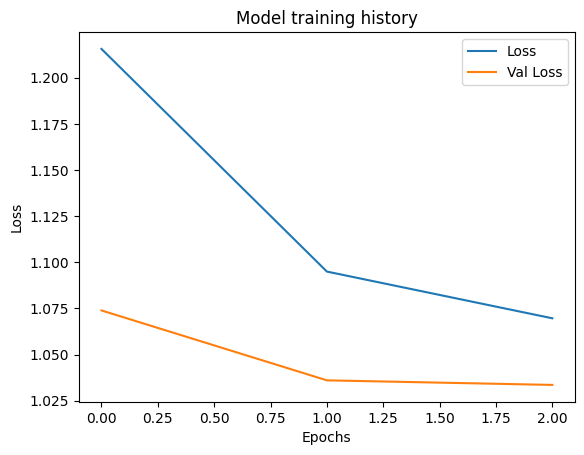

In [160]:
57241
plt.ylabel("Loss")
plt.legend(["Loss","Val Loss"])
plt.show()

In [162]:
test_encoding = create_encodings(test_data, "base")
test_labels = test_data['score']

In [163]:
test_loss, test_accuracy = bert_text_model.evaluate(input_ids_test, test_data['score'] - 1)
print("Test Accuracy:", test_accuracy)

82/82 [==============================] - 37s 451ms/step - loss: 1.0136 - accuracy: 0.5724
Test Accuracy: 0.5724191069602966


On the test set, the highest accuracy achieved was 0.57

We reasoned that in our task, the scores inherently follow an order. Consequently, misclassifying an essay with
a score of 3 instead of 4 differs significantly from predicting a score of 1. The error is much lower in the former
scenario

### 3.2 Regression: hyperbolic tangent approach 

We attempted to scale the scores from the [1, 6] range to the
[−1, 1] range, using the tanh activation function in the final
layer to predict values in this range. The aim was to achieve
a low mean squared error (MSE) on the original data after
rescaling them back to [1, 6].

In [184]:
BATCH_SIZE = 16
MAX_LENGTH = 512
EPOCHS = 12
CHECKPOINT_WEIHGTS_PATH = "models/model_03"

In [179]:
train_encodings = create_encodings(train_data, 'base')
val_encodings = create_encodings(val_data, 'base')

In [180]:
def scale_function(data):
    min_val = np.min(data)
    max_val = np.max(data)

    scale_factor = (max_val - min_val) / 2.0
    scaled_values = (data - min_val) / scale_factor - 1
    
    return scaled_values


def inverse_scale_function(scaled_data, original_data):
    original_max = np.max(original_data)
    original_min = np.min(original_data)
    
    scale_factor = (original_max - original_min) / 2.0
    original_data = (scaled_data + 1) * scale_factor + original_min
    
    return original_data

In [181]:
train_labels = scale_function(train_data['score'])
val_labels = scale_function(val_data['score'])

In [182]:
inversed_train_labels = inverse_scale_function(train_labels, train_data['score'])

inversed_train_labels.value_counts()

score
3.0    4396
2.0    3306
4.0    2748
1.0     876
5.0     679
6.0     109
Name: count, dtype: int64

In [183]:
model = TFBertModel.from_pretrained(MODEL_NAME)

for layer in model.layers:
    layer.trainable = False

regression_head = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(1, activation='tanh')
])

inputs = {
    'input_ids': tf.keras.layers.Input(shape=(MAX_LENGTH,), dtype=tf.int32),
    'attention_mask': tf.keras.layers.Input(shape=(MAX_LENGTH,), dtype=tf.int32),
}

output = model(inputs)[0]
# pooler_output = output[:, 0, :]
regression_output = regression_head(output)

# output = tf.keras.layers.Dense(1, activation='tanh')(output)

bert_text_model = tf.keras.models.Model(inputs=inputs, outputs=regression_output)

bert_text_model.summary()

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.weight', 'cls.predictions.bias']
- This IS expected if you are initializing TFBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions w

Model: "model_5"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_10 (InputLayer)       [(None, 512)]                0         []                            
                                                                                                  
 input_9 (InputLayer)        [(None, 512)]                0         []                            
                                                                                                  
 tf_bert_model_5 (TFBertMod  TFBaseModelOutputWithPooli   1083102   ['input_10[0][0]',            
 el)                         ngAndCrossAttentions(last_   72         'input_9[0][0]']             
                             hidden_state=(None, 512, 7                                           
                             68),                                                           

In [185]:
earlystop_callback = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    min_delta=0,
    patience=EARLY_STOPPING_PATIENCE,
    verbose=1,
    mode='auto'
)

checkpoint_callback_bert = tf.keras.callbacks.ModelCheckpoint(
    filepath=CHECKPOINT_WEIHGTS_PATH,
    monitor='val_loss',
    verbose=1
)

In [186]:
bert_text_model.compile(
    optimizer=tf.keras.optimizers.Adam(3e-5),
    loss='mean_squared_error',
    metrics=['mean_absolute_error'],
)

In [187]:
def data_generator(encodings, labels, batch_size):
    num_samples = len(labels)
    num_batches = num_samples // batch_size
    
    while True:
        indices = tf.range(num_samples)
        indices = tf.random.shuffle(indices)
        
        for i in range(num_batches):
            batch_indices = indices[i * batch_size: (i + 1) * batch_size]
            batch_encodings = {key: tf.gather(encodings[key], batch_indices) for key in encodings.keys()}
            batch_labels = tf.gather(labels, batch_indices)
            
            yield batch_encodings, batch_labels

In [188]:
train_generator = data_generator(train_encodings, train_labels, BATCH_SIZE)
val_generator = data_generator(val_encodings, val_labels, BATCH_SIZE)

&#x26a0;&#xfe0f; **This code could take long to execute**

In [190]:
history_bert = bert_text_model.fit(
    train_generator,
    epochs=EPOCHS,
    steps_per_epoch=len(train_data) // BATCH_SIZE,
    validation_data=val_generator,
    validation_steps=len(val_data) // BATCH_SIZE,
    callbacks=[checkpoint_callback_bert, earlystop_callback],
    shuffle=True
)

Epoch 1/12


757/757 [==============================] - ETA: 0s - loss: 0.4720 - mean_absolute_error: 0.5631
Epoch 1: val_loss improved from inf to 0.11015, saving model to models/model_03
INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(None, 256), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fd749cd4ca0>, 140562624989504), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(None, 256), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fd749cd4ca0>, 140562624989504), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(256,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fd749cd4b20>, 140562624989344), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(256,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fd749cd4b20>, 140562624989344), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(256, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fd749cd57b0>, 140562624888736), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(256, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fd749cd57b0>, 140562624888736), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fd6584e7fd0>, 140562624987424), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fd6584e7fd0>, 140562624987424), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 64), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fd6584e61a0>, 140562624994464), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 64), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fd6584e61a0>, 140562624994464), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(64,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fd748e29c60>, 140562624994224), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(64,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fd748e29c60>, 140562624994224), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(64, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fd6584e4730>, 140562624998144), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(64, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fd6584e4730>, 140562624998144), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fd721d16230>, 140562624998384), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fd721d16230>, 140562624998384), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(None, 256), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fd6f818e5c0>, 140562624989504), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(None, 256), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fd6f818e5c0>, 140562624989504), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(256,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fd7220b1900>, 140562624989344), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(256,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fd7220b1900>, 140562624989344), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(256, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fd6d0416080>, 140562624888736), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(256, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fd6d0416080>, 140562624888736), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fd6d0416d40>, 140562624987424), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fd6d0416d40>, 140562624987424), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 64), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fd6d0416950>, 140562624994464), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 64), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fd6d0416950>, 140562624994464), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(64,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fd6d0415240>, 140562624994224), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(64,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fd6d0415240>, 140562624994224), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(64, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fd6d0749240>, 140562624998144), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(64, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fd6d0749240>, 140562624998144), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fd6d074bbb0>, 140562624998384), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fd6d074bbb0>, 140562624998384), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(None, 256), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fd749cd4ca0>, 140562624989504), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(None, 256), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fd749cd4ca0>, 140562624989504), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(256,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fd749cd4b20>, 140562624989344), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(256,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fd749cd4b20>, 140562624989344), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(256, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fd749cd57b0>, 140562624888736), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(256, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fd749cd57b0>, 140562624888736), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fd6584e7fd0>, 140562624987424), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fd6584e7fd0>, 140562624987424), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 64), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fd6584e61a0>, 140562624994464), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 64), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fd6584e61a0>, 140562624994464), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(64,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fd748e29c60>, 140562624994224), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(64,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fd748e29c60>, 140562624994224), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(64, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fd6584e4730>, 140562624998144), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(64, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fd6584e4730>, 140562624998144), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fd721d16230>, 140562624998384), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fd721d16230>, 140562624998384), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(None, 256), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fd6f818e5c0>, 140562624989504), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(None, 256), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fd6f818e5c0>, 140562624989504), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(256,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fd7220b1900>, 140562624989344), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(256,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fd7220b1900>, 140562624989344), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(256, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fd6d0416080>, 140562624888736), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(256, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fd6d0416080>, 140562624888736), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fd6d0416d40>, 140562624987424), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fd6d0416d40>, 140562624987424), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 64), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fd6d0416950>, 140562624994464), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 64), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fd6d0416950>, 140562624994464), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(64,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fd6d0415240>, 140562624994224), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(64,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fd6d0415240>, 140562624994224), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(64, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fd6d0749240>, 140562624998144), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(64, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fd6d0749240>, 140562624998144), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fd6d074bbb0>, 140562624998384), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fd6d074bbb0>, 140562624998384), {}).
2024-06-03 16:35:22.423137: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 402653184 exceeds 10% of free system memory.
2024-06-03 16:35:22.544527: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 402653184 exceeds 10% of free system memory.
2024-06-03 16:35:22.702780: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 402653184 exceeds 10% of free system memory.


INFO:tensorflow:Assets written to: models/model_03/assets


INFO:tensorflow:Assets written to: models/model_03/assets


757/757 [==============================] - 333s 440ms/step - loss: 0.4720 - mean_absolute_error: 0.5631 - val_loss: 0.1102 - val_mean_absolute_error: 0.2646
Epoch 2/12
757/757 [==============================] - ETA: 0s - loss: 0.1296 - mean_absolute_error: 0.2898
Epoch 2: val_loss did not improve from 0.11015
757/757 [==============================] - 268s 354ms/step - loss: 0.1296 - mean_absolute_error: 0.2898 - val_loss: 0.1120 - val_mean_absolute_error: 0.2697
Epoch 3/12
757/757 [==============================] - ETA: 0s - loss: 0.1166 - mean_absolute_error: 0.2750
Epoch 3: val_loss improved from 0.11015 to 0.10638, saving model to models/model_03
INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(None, 256), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fd749cd4ca0>, 140562624989504), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(None, 256), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fd749cd4ca0>, 140562624989504), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(256,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fd749cd4b20>, 140562624989344), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(256,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fd749cd4b20>, 140562624989344), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(256, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fd749cd57b0>, 140562624888736), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(256, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fd749cd57b0>, 140562624888736), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fd6584e7fd0>, 140562624987424), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fd6584e7fd0>, 140562624987424), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 64), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fd6584e61a0>, 140562624994464), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 64), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fd6584e61a0>, 140562624994464), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(64,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fd748e29c60>, 140562624994224), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(64,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fd748e29c60>, 140562624994224), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(64, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fd6584e4730>, 140562624998144), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(64, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fd6584e4730>, 140562624998144), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fd721d16230>, 140562624998384), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fd721d16230>, 140562624998384), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(None, 256), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fd6f818e5c0>, 140562624989504), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(None, 256), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fd6f818e5c0>, 140562624989504), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(256,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fd7220b1900>, 140562624989344), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(256,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fd7220b1900>, 140562624989344), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(256, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fd6d0416080>, 140562624888736), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(256, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fd6d0416080>, 140562624888736), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fd6d0416d40>, 140562624987424), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fd6d0416d40>, 140562624987424), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 64), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fd6d0416950>, 140562624994464), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 64), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fd6d0416950>, 140562624994464), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(64,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fd6d0415240>, 140562624994224), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(64,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fd6d0415240>, 140562624994224), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(64, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fd6d0749240>, 140562624998144), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(64, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fd6d0749240>, 140562624998144), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fd6d074bbb0>, 140562624998384), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fd6d074bbb0>, 140562624998384), {}).
2024-06-03 16:45:15.304634: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 402653184 exceeds 10% of free system memory.
2024-06-03 16:45:15.413787: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 402653184 exceeds 10% of free system memory.


INFO:tensorflow:Assets written to: models/model_03/assets


INFO:tensorflow:Assets written to: models/model_03/assets


757/757 [==============================] - 326s 431ms/step - loss: 0.1166 - mean_absolute_error: 0.2750 - val_loss: 0.1064 - val_mean_absolute_error: 0.2582
Epoch 4/12
757/757 [==============================] - ETA: 0s - loss: 0.1078 - mean_absolute_error: 0.2645
Epoch 4: val_loss improved from 0.10638 to 0.10454, saving model to models/model_03
INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(None, 256), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fd749cd4ca0>, 140562624989504), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(None, 256), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fd749cd4ca0>, 140562624989504), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(256,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fd749cd4b20>, 140562624989344), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(256,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fd749cd4b20>, 140562624989344), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(256, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fd749cd57b0>, 140562624888736), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(256, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fd749cd57b0>, 140562624888736), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fd6584e7fd0>, 140562624987424), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fd6584e7fd0>, 140562624987424), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 64), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fd6584e61a0>, 140562624994464), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 64), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fd6584e61a0>, 140562624994464), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(64,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fd748e29c60>, 140562624994224), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(64,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fd748e29c60>, 140562624994224), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(64, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fd6584e4730>, 140562624998144), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(64, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fd6584e4730>, 140562624998144), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fd721d16230>, 140562624998384), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fd721d16230>, 140562624998384), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(None, 256), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fd6f818e5c0>, 140562624989504), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(None, 256), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fd6f818e5c0>, 140562624989504), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(256,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fd7220b1900>, 140562624989344), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(256,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fd7220b1900>, 140562624989344), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(256, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fd6d0416080>, 140562624888736), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(256, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fd6d0416080>, 140562624888736), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fd6d0416d40>, 140562624987424), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fd6d0416d40>, 140562624987424), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 64), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fd6d0416950>, 140562624994464), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 64), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fd6d0416950>, 140562624994464), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(64,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fd6d0415240>, 140562624994224), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(64,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fd6d0415240>, 140562624994224), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(64, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fd6d0749240>, 140562624998144), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(64, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fd6d0749240>, 140562624998144), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fd6d074bbb0>, 140562624998384), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fd6d074bbb0>, 140562624998384), {}).


INFO:tensorflow:Assets written to: models/model_03/assets


INFO:tensorflow:Assets written to: models/model_03/assets


757/757 [==============================] - 326s 430ms/step - loss: 0.1078 - mean_absolute_error: 0.2645 - val_loss: 0.1045 - val_mean_absolute_error: 0.2590
Epoch 5/12
757/757 [==============================] - ETA: 0s - loss: 0.0999 - mean_absolute_error: 0.2543
Epoch 5: val_loss did not improve from 0.10454
757/757 [==============================] - 260s 344ms/step - loss: 0.0999 - mean_absolute_error: 0.2543 - val_loss: 0.1204 - val_mean_absolute_error: 0.2806
Epoch 6/12
757/757 [==============================] - ETA: 0s - loss: 0.0959 - mean_absolute_error: 0.2474
Epoch 6: val_loss did not improve from 0.10454
757/757 [==============================] - 281s 372ms/step - loss: 0.0959 - mean_absolute_error: 0.2474 - val_loss: 0.1062 - val_mean_absolute_error: 0.2626
Epoch 7/12
757/757 [==============================] - ETA: 0s - loss: 0.0913 - mean_absolute_error: 0.2423
Epoch 7: val_loss did not improve from 0.10454
757/757 [==============================] - 284s 375ms/step - loss: 

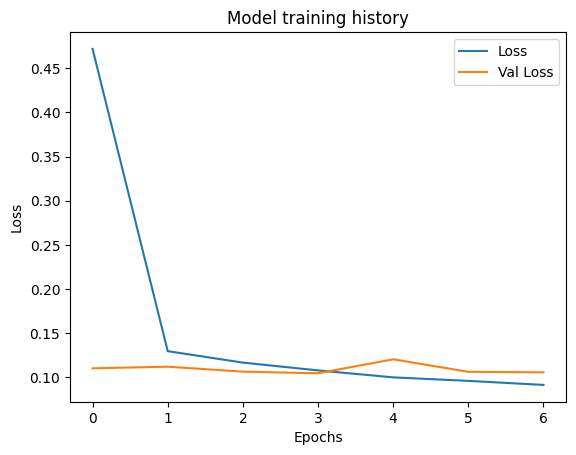

In [191]:
plt.plot(history_bert.history["loss"])
plt.plot(history_bert.history["val_loss"])
plt.title("Model training history")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(["Loss","Val Loss"])
plt.show()

In [193]:
test_encoding = create_encodings(test_data, 'base')
test_labels = scale_function(test_data['score'])  # Scaling labels from [-1, 1]

In [194]:
test_generator = data_generator(test_encoding, test_labels, BATCH_SIZE)

In [195]:
test_loss, test_MAE = bert_text_model.evaluate(
    test_generator, 
    steps=len(test_data) // BATCH_SIZE
)

print("Test MSE:", test_loss)
print("TEST MAE:", test_MAE)

162/162 [==============================] - 42s 259ms/step - loss: 0.0988 - mean_absolute_error: 0.2491
Test MSE: 0.09878332912921906
TEST MAE: 0.24910733103752136


However, the best MAE on the test set was 0.25, which
was too high for scaled data

### 3.3 Regression: linear approach

We experimented with a linear activation function in the final layer of the regression head on the BERT model.

We had reservations about
this method due to its lack of domain knowledge of the
scores and potential issues with exploding gradients and un-
stable learning

In [2]:
import tensorflow as tf
from transformers import BertTokenizer, TFBertModel
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

2024-06-04 11:06:51.574424: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-06-04 11:06:53.139815: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
/media/davide/Volume/Embeddings/.venv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
policy = tf.keras.mixed_precision.Policy('mixed_float16')
tf.keras.mixed_precision.set_global_policy(policy)

INFO:tensorflow:Mixed precision compatibility check (mixed_float16): OK
Your GPU will likely run quickly with dtype policy mixed_float16 as it has compute capability of at least 7.0. Your GPU: NVIDIA GeForce RTX 3060, compute capability 8.6


2024-06-04 11:06:58.535315: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-06-04 11:06:58.590819: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-06-04 11:06:58.591027: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-

In [34]:
BATCH_SIZE = 32
BATCH_SIZE_IELTS = 16
MAX_LENGTH = 512
EARLY_STOPPING_PATIENCE = 50
EARLY_STOPPING_PATIENCE_IELTS = 25
EPOCHS = 200
EPOCHS_IELTS = 100
MODEL_NAME = "bert-base-uncased"
CHECKPOINT_IELTS_PATH = "models/model_04_ielts.ckpt/"
MODEL_BEST_CHECKPOINT = "models/model_04.ckpt/"

In [26]:
BASE_PATH = "dataset/"
DS = BASE_PATH + "train.csv"
IELTS_DS_PATH = BASE_PATH + "ielts_writing_dataset.csv"
HISTORY_BERT_PICKLE = "models/history_bert.pkl"

In [8]:
df = pd.read_csv(DS)

train_data, test_data = train_test_split(df, test_size=0.4, random_state=42, stratify=df["score"])
test_data, val_data = train_test_split(test_data, test_size=0.5, random_state=42, stratify=test_data["score"])

In [9]:
print("Train:", len(train_data))
print("Validation:", len(val_data))
print("Test:", len(test_data))

Train: 10384
Validation: 3462
Test: 3461


In [10]:
tokenizer = BertTokenizer.from_pretrained(MODEL_NAME)

In [11]:
def create_encodings(data, max_length=MAX_LENGTH):
    encodings = tokenizer(data["full_text"].tolist(), 
                          truncation=True,
                          padding='max_length',
                          max_length=max_length,
                          return_tensors='tf'
                          )
    return encodings

In [12]:
train_encodings = create_encodings(train_data)
val_encodings = create_encodings(val_data)

2024-06-04 11:08:39.472330: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-06-04 11:08:39.472597: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-06-04 11:08:39.472787: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-

In [13]:
train_labels = train_data['score']
val_labels = val_data['score']

In [14]:
model = TFBertModel.from_pretrained(MODEL_NAME)

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.weight', 'cls.predictions.bias']
- This IS expected if you are initializing TFBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions w

In [15]:
for layer in model.layers:
    layer.trainable = False

In [16]:
def create_checkpointed_model():
    inputs = {
        'input_ids': tf.keras.layers.Input(shape=(MAX_LENGTH,), dtype=tf.int32),
        'attention_mask': tf.keras.layers.Input(shape=(MAX_LENGTH,), dtype=tf.int32),
    }
                                                                                                                                    
    output = model(inputs)[0]
    pooler_output = output[:, 0, :]
    
    regression_head = tf.keras.models.Sequential([
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(512, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)),
        tf.keras.layers.Dropout(0.3),
        tf.keras.layers.Dense(256, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(0.3),
        tf.keras.layers.Dense(256, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(0.3),
        tf.keras.layers.Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dense(64, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dense(1, activation='linear'),
    ])
        
    regression_output = regression_head(pooler_output)
    
    return tf.keras.models.Model(inputs=inputs, outputs=regression_output)

In [17]:
bert_text_model = create_checkpointed_model()

In [18]:
earlystop_callback = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    min_delta=0,
    patience=EARLY_STOPPING_PATIENCE,
    verbose=1,
    mode='auto'
)

checkpoint_callback_bert = tf.keras.callbacks.ModelCheckpoint(
    filepath=MODEL_BEST_CHECKPOINT,
    monitor='val_loss',
    save_best_only=True,
    save_weights_only=True,
    mode='min',
    verbose=1
)

In [82]:
def r2_score(y_true, y_pred):
    SS_res = tf.reduce_sum(tf.square(y_true - y_pred))
    SS_tot = tf.reduce_sum(tf.square(y_true - tf.reduce_mean(y_true)))
    return 1 - SS_res / (SS_tot + tf.keras.backend.epsilon())

def rmse(y_true, y_pred):
    return tf.sqrt(tf.reduce_mean(tf.square(y_true - y_pred)))

In [20]:
initial_learning_rate = 3e-5
weight_decay = 1e-5
optimizer = tf.keras.optimizers.AdamW(learning_rate=initial_learning_rate, weight_decay=weight_decay)

In [21]:
bert_text_model.compile(
    optimizer=optimizer,
    loss='mean_squared_error',
    metrics=['mean_absolute_error', r2_score, rmse],
)

In [22]:
def data_generator(encodings, labels, batch_size):
    num_samples = len(labels)
    num_batches = num_samples // batch_size
    
    while True:
        indices = tf.range(num_samples)
        indices = tf.random.shuffle(indices)
        
        for i in range(num_batches):
            batch_indices = indices[i * batch_size: (i + 1) * batch_size]
            batch_encodings = {key: tf.gather(encodings[key], batch_indices) for key in encodings.keys()}
            batch_labels = tf.gather(labels, batch_indices)
            
            yield batch_encodings, batch_labels

In [23]:
train_generator = data_generator(train_encodings, train_labels, BATCH_SIZE)
val_generator = data_generator(val_encodings, val_labels, BATCH_SIZE)

&#x26a0;&#xfe0f; **This code could take long to execute**

In [ ]:
history_bert = bert_text_model.fit(
    train_generator,
    epochs=EPOCHS,
    steps_per_epoch=len(train_data) // BATCH_SIZE,
    validation_data=val_generator,
    validation_steps=len(val_data) // BATCH_SIZE,
    callbacks=[checkpoint_callback_bert, earlystop_callback],
    shuffle=True
)

In [28]:
history_bert = history_bert_from_pickle

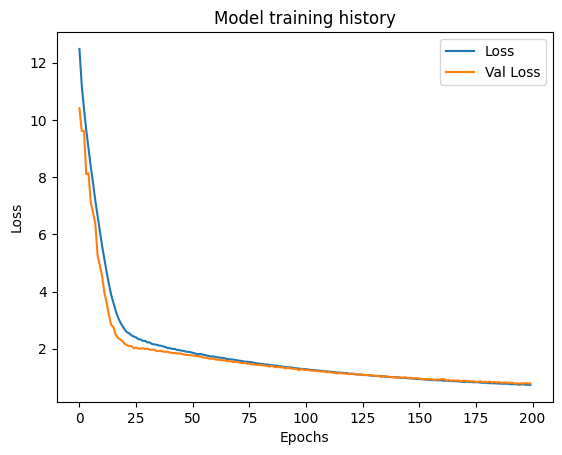

In [29]:
plt.plot(history_bert["loss"])
plt.plot(history_bert["val_loss"])
plt.title("Model training history")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(["Loss","Val Loss"])
plt.show()

In [35]:
bert_text_model.load_weights(MODEL_BEST_CHECKPOINT)

In [36]:
test_encoding = create_encodings(test_data)
test_labels = test_data['score']

In [37]:
test_labels.value_counts()

score
3    1256
2     944
4     785
1     251
5     194
6      31
Name: count, dtype: int64

In [38]:
test_generator = data_generator(test_encoding, test_labels, BATCH_SIZE)

In [39]:
test_loss, test_MAE, r2, rmse = bert_text_model.evaluate(
    test_generator, 
    steps=len(test_data) // BATCH_SIZE
)

print("Test MSE:", test_loss)
print("TEST MAE:", test_MAE)
print("Test r2:", r2)
print("TEST RMSE:", rmse)

/tmp/__autograph_generated_filemlfv0uup.py:63: UserWarning: Input dict contained keys ['token_type_ids'] which did not match any model input. They will be ignored by the model.
  ag__.converted_call(ag__.ld(warnings).warn, (ag__.converted_call('Input dict contained keys {} which did not match any model input. They will be ignored by the model.'.format, ([ag__.ld(n) for n in ag__.converted_call(ag__.ld(tensors).keys, (), None, fscope) if ag__.ld(n) not in ag__.ld(ref_input_names)],), None, fscope),), dict(stacklevel=2), fscope)


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: <gast.gast.Expr object at 0x7f718c121930>
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: <gast.gast.Expr object at 0x7f718c121930>
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
108/108 [==============================] - 69s 462ms/step - loss: 0.6322 - mean_absolute_error: 0.5074 - r2_score: 0.5665 - rmse: 0.6630
Test MSE: 0.6321998238563538
TEST MAE: 0.5074338316917419
Test r2: 0.566500723361969
TEST RMSE: 0.6629855632781982


Test MSE 0.62
Test MAE 0.51
Test R2 0.57
Test RMSE 0.66

In [40]:
predictions = bert_text_model.predict(test_generator, steps=len(test_data) // BATCH_SIZE)

108/108 [==============================] - 57s 466ms/step


In [41]:
predictions = np.array(predictions, dtype=np.float32)

In [42]:
test_predictions = np.concatenate(predictions)
test_labels_array = test_labels[:len(test_predictions)]

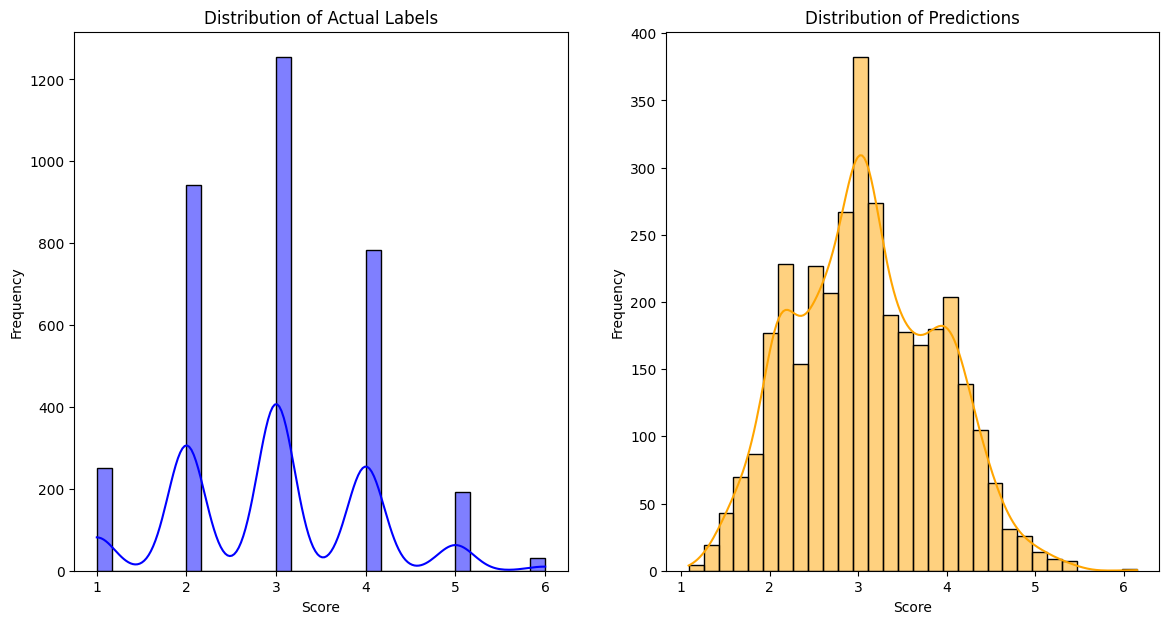

In [43]:
plt.figure(figsize=(14, 7))

plt.subplot(1, 2, 1)
sns.histplot(test_labels_array, bins=30, kde=True, color='blue')
plt.title("Distribution of Actual Labels")
plt.xlabel("Score")
plt.ylabel("Frequency")

plt.subplot(1, 2, 2)
sns.histplot(test_predictions, bins=30, kde=True, color='orange')
plt.title("Distribution of Predictions")
plt.xlabel("Score")
plt.ylabel("Frequency")

plt.show()

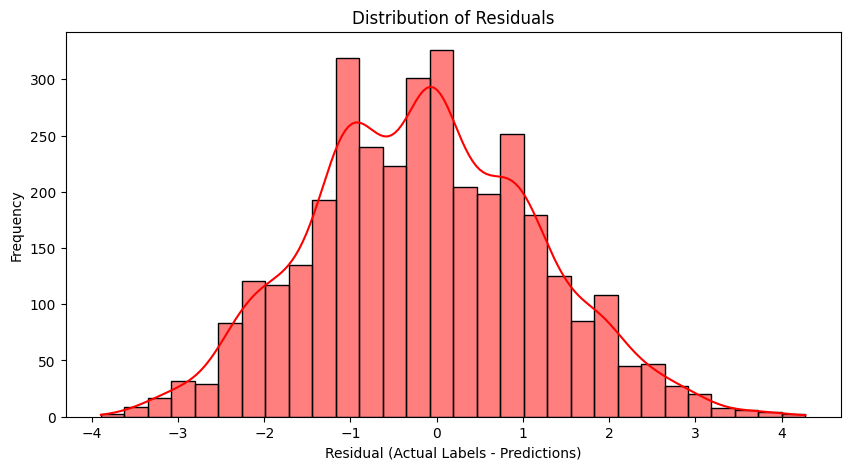

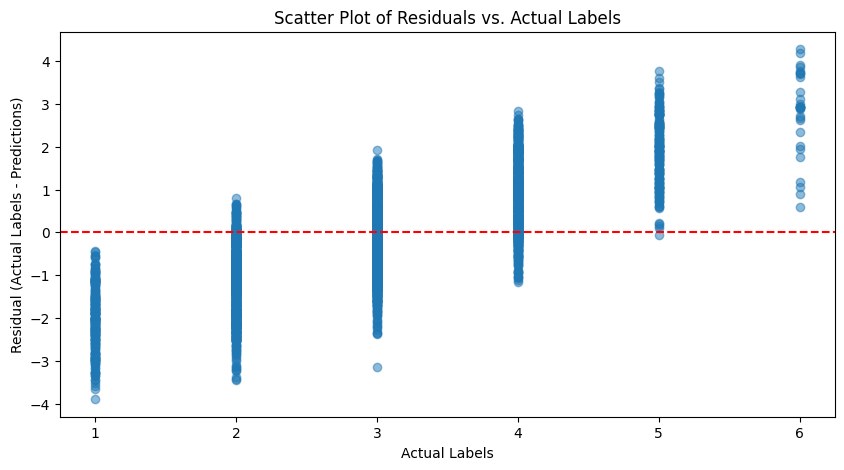

In [44]:
residuals = test_labels_array - test_predictions

plt.figure(figsize=(10, 5))
sns.histplot(residuals, bins=30, kde=True, color='red')
plt.title("Distribution of Residuals")
plt.xlabel("Residual (Actual Labels - Predictions)")
plt.ylabel("Frequency")
plt.show()

plt.figure(figsize=(10, 5))
plt.scatter(test_labels_array, residuals, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.title("Scatter Plot of Residuals vs. Actual Labels")
plt.xlabel("Actual Labels")
plt.ylabel("Residual (Actual Labels - Predictions)")
plt.show()


### 4. Transfer Learning

When we attempted to fine-tune this model our best model on the IELTS dataset

In [45]:
df_ielts_original = pd.read_csv(IELTS_DS_PATH)
df_ielts_original.head()

,Task_Type,Question,Essay,Examiner_Commen,Task_Response,Coherence_Cohesion,Lexical_Resource,Range_Accuracy,Overall
0,1,The bar chart below describes some changes abo...,"Between 1995 and 2010, a study was conducted r...",NaN,NaN,NaN,NaN,NaN,5.5
1,2,Rich countries often give money to poorer coun...,Poverty represents a worldwide crisis. It is t...,NaN,NaN,NaN,NaN,NaN,6.5
2,1,The bar chart below describes some changes abo...,The left chart shows the population change hap...,NaN,NaN,NaN,NaN,NaN,5.0
3,2,Rich countries often give money to poorer coun...,Human beings are facing many challenges nowada...,NaN,NaN,NaN,NaN,NaN,5.5
4,1,The graph below shows the number of overseas v...,Information about the thousands of visits from...,NaN,NaN,NaN,NaN,NaN,7.0


In [46]:
df_ielts_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1435 entries, 0 to 1434
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Task_Type           1435 non-null   int64  
 1   Question            1435 non-null   object 
 2   Essay               1435 non-null   object 
 3   Examiner_Commen     62 non-null     object 
 4   Task_Response       0 non-null      float64
 5   Coherence_Cohesion  0 non-null      float64
 6   Lexical_Resource    0 non-null      float64
 7   Range_Accuracy      0 non-null      float64
 8   Overall             1435 non-null   float64
dtypes: float64(5), int64(1), object(3)
memory usage: 101.0+ KB


In [47]:
df_ielts_original['Overall'].value_counts()

Overall
6.0    264
7.0    254
6.5    250
5.5    176
7.5    138
8.0    137
5.0    104
9.0     37
8.5     35
4.5     21
4.0     11
3.5      5
3.0      2
1.0      1
Name: count, dtype: int64

In [48]:
df_ielts = df_ielts_original[['Essay', 'Overall']]

df_ielts = df_ielts.rename(columns={'Essay': 'full_text', 'Overall': 'score'})

df_ielts.head()

,full_text,score
0,"Between 1995 and 2010, a study was conducted r...",5.5
1,Poverty represents a worldwide crisis. It is t...,6.5
2,The left chart shows the population change hap...,5.0
3,Human beings are facing many challenges nowada...,5.5
4,Information about the thousands of visits from...,7.0


In [49]:
df_ielts = df_ielts[df_ielts['score'].map(df_ielts['score'].value_counts()) > 2]

df_ielts['score'].value_counts()

score
6.0    264
7.0    254
6.5    250
5.5    176
7.5    138
8.0    137
5.0    104
9.0     37
8.5     35
4.5     21
4.0     11
3.5      5
Name: count, dtype: int64

In [50]:
train_data_ielts, test_data_ielts = train_test_split(df_ielts, test_size=0.3, random_state=42, stratify=df_ielts["score"])
test_data_ielts, val_data_ielts = train_test_split(test_data_ielts, test_size=0.5, random_state=42, stratify=test_data_ielts["score"])

print("Train:", len(train_data_ielts))
print("Validation:", len(val_data_ielts))
print("Test", len(test_data_ielts))

Train: 1002
Validation: 215
Test 215


In [51]:
train_encodings_ielts = create_encodings(train_data_ielts)
val_encodings_ielts = create_encodings(val_data_ielts)
test_encodings_ielts = create_encodings(test_data_ielts)

In [52]:
train_labels_ielts = train_data_ielts['score']
val_labels_ielts = val_data_ielts['score']
test_labels_ielts = test_data_ielts['score']

In [53]:
earlystop_callback_ielts = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    min_delta=0,
    patience=EARLY_STOPPING_PATIENCE_IELTS,
    verbose=1,
    mode='auto'
)

checkpoint_callback_bert_ielts = tf.keras.callbacks.ModelCheckpoint(
    filepath=CHECKPOINT_IELTS_PATH,
    monitor='val_loss',
    save_best_only=True,
    save_weights_only=True,
    mode='min',
    verbose=1
)

In [54]:
bert_text_model.layers[-1].layers

In [60]:
print(bert_text_model.layers[-1].layers[1].trainable)
print(bert_text_model.layers[-1].layers[3].trainable)

False
False


In [61]:
bert_text_model.layers[-1].layers[1].trainable = False
bert_text_model.layers[-1].layers[3].trainable = False

In [62]:
print(bert_text_model.layers[-1].layers[1].trainable)
print(bert_text_model.layers[-1].layers[3].trainable)

False
False


In [63]:
train_generator_ielts = data_generator(train_encodings_ielts, train_labels_ielts, BATCH_SIZE_IELTS)
val_generator_ielts = data_generator(val_encodings_ielts, val_labels_ielts, BATCH_SIZE_IELTS)
test_generator_ielts = data_generator(test_encodings_ielts, test_labels_ielts, BATCH_SIZE_IELTS)

In [64]:
lr_schedule = tf.keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss', 
    factor=0.1, 
    patience=5, 
    min_lr=1e-11,
    verbose=1
)

In [83]:
bert_text_model.compile(
    optimizer=tf.keras.optimizers.Adam(3e-4),
    loss='mean_squared_error',
    metrics=['mean_absolute_error', r2_score, rmse],
)

In [ ]:
history_bert_ielts = bert_text_model.fit(
    train_generator_ielts,
    epochs=EPOCHS_IELTS,
    steps_per_epoch=len(train_data_ielts) // BATCH_SIZE_IELTS,
    validation_data=val_generator_ielts,
    validation_steps=len(val_data_ielts) // BATCH_SIZE_IELTS,
    callbacks=[
        checkpoint_callback_bert_ielts, 
        earlystop_callback_ielts, 
        lr_schedule
    ],
    shuffle=True
)

In [75]:
import re

text_logs = """
Epoch 1/100
/tmp/__autograph_generated_files588ph7d.py:63: UserWarning: Input dict contained keys ['token_type_ids'] which did not match any model input. They will be ignored by the model.
  ag__.converted_call(ag__.ld(warnings).warn, (ag__.converted_call('Input dict contained keys {} which did not match any model input. They will be ignored by the model.'.format, ([ag__.ld(n) for n in ag__.converted_call(ag__.ld(tensors).keys, (), None, fscope) if ag__.ld(n) not in ag__.ld(ref_input_names)],), None, fscope),), dict(stacklevel=2), fscope)
62/62 [==============================] - ETA: 0s - loss: 2.4059 - mean_absolute_error: 1.2382 - r2_score: -1.4798 - rmse: 1.4664
Epoch 1: val_loss improved from 3.24294 to 1.45438, saving model to models/working/bert-uncased-ielts.ckpt/
62/62 [==============================] - 47s 481ms/step - loss: 2.4059 - mean_absolute_error: 1.2382 - r2_score: -1.4798 - rmse: 1.4664 - val_loss: 1.4544 - val_mean_absolute_error: 0.9418 - val_r2_score: -0.2416 - val_rmse: 1.1178 - lr: 3.0000e-04
Epoch 2/100
62/62 [==============================] - ETA: 0s - loss: 1.4712 - mean_absolute_error: 0.9132 - r2_score: -0.3594 - rmse: 1.1163
Epoch 2: val_loss improved from 1.45438 to 1.12053, saving model to models/working/bert-uncased-ielts.ckpt/
62/62 [==============================] - 22s 358ms/step - loss: 1.4712 - mean_absolute_error: 0.9132 - r2_score: -0.3594 - rmse: 1.1163 - val_loss: 1.1205 - val_mean_absolute_error: 0.7859 - val_r2_score: -0.0348 - val_rmse: 0.9567 - lr: 3.0000e-04
Epoch 3/100
62/62 [==============================] - ETA: 0s - loss: 1.1142 - mean_absolute_error: 0.7810 - r2_score: 0.0367 - rmse: 0.9492
Epoch 3: val_loss improved from 1.12053 to 1.06900, saving model to models/working/bert-uncased-ielts.ckpt/
62/62 [==============================] - 22s 358ms/step - loss: 1.1142 - mean_absolute_error: 0.7810 - r2_score: 0.0367 - rmse: 0.9492 - val_loss: 1.0690 - val_mean_absolute_error: 0.7583 - val_r2_score: 0.0992 - val_rmse: 0.9242 - lr: 3.0000e-04
Epoch 4/100
62/62 [==============================] - ETA: 0s - loss: 1.0238 - mean_absolute_error: 0.7323 - r2_score: 0.1437 - rmse: 0.9001
Epoch 4: val_loss improved from 1.06900 to 0.95677, saving model to models/working/bert-uncased-ielts.ckpt/
62/62 [==============================] - 22s 358ms/step - loss: 1.0238 - mean_absolute_error: 0.7323 - r2_score: 0.1437 - rmse: 0.9001 - val_loss: 0.9568 - val_mean_absolute_error: 0.6955 - val_r2_score: 0.2938 - val_rmse: 0.8623 - lr: 3.0000e-04
Epoch 5/100
62/62 [==============================] - ETA: 0s - loss: 1.0204 - mean_absolute_error: 0.7389 - r2_score: 0.0936 - rmse: 0.8974
Epoch 5: val_loss did not improve from 0.95677
62/62 [==============================] - 21s 333ms/step - loss: 1.0204 - mean_absolute_error: 0.7389 - r2_score: 0.0936 - rmse: 0.8974 - val_loss: 0.9835 - val_mean_absolute_error: 0.7049 - val_r2_score: 0.2594 - val_rmse: 0.8853 - lr: 3.0000e-04
Epoch 6/100
62/62 [==============================] - ETA: 0s - loss: 1.0218 - mean_absolute_error: 0.7454 - r2_score: 0.1765 - rmse: 0.9025
Epoch 6: val_loss improved from 0.95677 to 0.94419, saving model to models/working/bert-uncased-ielts.ckpt/
62/62 [==============================] - 22s 359ms/step - loss: 1.0218 - mean_absolute_error: 0.7454 - r2_score: 0.1765 - rmse: 0.9025 - val_loss: 0.9442 - val_mean_absolute_error: 0.6667 - val_r2_score: 0.1830 - val_rmse: 0.8461 - lr: 3.0000e-04
Epoch 7/100
62/62 [==============================] - ETA: 0s - loss: 0.9677 - mean_absolute_error: 0.7112 - r2_score: 0.1416 - rmse: 0.8741
Epoch 7: val_loss did not improve from 0.94419
62/62 [==============================] - 21s 334ms/step - loss: 0.9677 - mean_absolute_error: 0.7112 - r2_score: 0.1416 - rmse: 0.8741 - val_loss: 0.9570 - val_mean_absolute_error: 0.6965 - val_r2_score: 0.1419 - val_rmse: 0.8731 - lr: 3.0000e-04
Epoch 8/100
62/62 [==============================] - ETA: 0s - loss: 1.0253 - mean_absolute_error: 0.7342 - r2_score: 0.1788 - rmse: 0.9025
Epoch 8: val_loss did not improve from 0.94419
62/62 [==============================] - 21s 333ms/step - loss: 1.0253 - mean_absolute_error: 0.7342 - r2_score: 0.1788 - rmse: 0.9025 - val_loss: 0.9472 - val_mean_absolute_error: 0.6978 - val_r2_score: 0.2269 - val_rmse: 0.8571 - lr: 3.0000e-04
Epoch 9/100
62/62 [==============================] - ETA: 0s - loss: 0.9688 - mean_absolute_error: 0.7105 - r2_score: 0.1423 - rmse: 0.8716
Epoch 9: val_loss did not improve from 0.94419
62/62 [==============================] - 21s 334ms/step - loss: 0.9688 - mean_absolute_error: 0.7105 - r2_score: 0.1423 - rmse: 0.8716 - val_loss: 0.9517 - val_mean_absolute_error: 0.6913 - val_r2_score: 0.2119 - val_rmse: 0.8665 - lr: 3.0000e-04
Epoch 10/100
62/62 [==============================] - ETA: 0s - loss: 1.0002 - mean_absolute_error: 0.7275 - r2_score: 0.1939 - rmse: 0.8885
Epoch 10: val_loss did not improve from 0.94419
62/62 [==============================] - 21s 335ms/step - loss: 1.0002 - mean_absolute_error: 0.7275 - r2_score: 0.1939 - rmse: 0.8885 - val_loss: 0.9454 - val_mean_absolute_error: 0.6776 - val_r2_score: 0.2211 - val_rmse: 0.8609 - lr: 3.0000e-04
Epoch 11/100
62/62 [==============================] - ETA: 0s - loss: 1.0422 - mean_absolute_error: 0.7510 - r2_score: 0.1383 - rmse: 0.9118
Epoch 11: val_loss did not improve from 0.94419

Epoch 11: ReduceLROnPlateau reducing learning rate to 3.000000142492354e-05.
62/62 [==============================] - 21s 333ms/step - loss: 1.0422 - mean_absolute_error: 0.7510 - r2_score: 0.1383 - rmse: 0.9118 - val_loss: 0.9983 - val_mean_absolute_error: 0.6982 - val_r2_score: 0.2225 - val_rmse: 0.8925 - lr: 3.0000e-04
Epoch 12/100
62/62 [==============================] - ETA: 0s - losMODEL_IELTS_BESTCHECKPOINTs: 1.0255 - mean_absolute_error: 0.7357 - r2_score: 0.1755 - rmse: 0.9004
Epoch 14: val_loss did not improve from 0.86353
62/62 [==============================] - 23s 365ms/step - loss: 1.0255 - mean_absolute_error: 0.7357 - r2_score: 0.1755 - rmse: 0.9004 - val_loss: 1.0317 - val_mean_absolute_error: 0.7261 - val_r2_score: 0.2595 - val_rmse: 0.8953 - lr: 3.0000e-05
Epoch 15/100
62/62 [==============================] - ETA: 0s - loss: 0.9488 - mean_absolute_error: 0.7014 - r2_score: 0.2055 - rmse: 0.8507
Epoch 15: val_loss did not improve from 0.86353
62/62 [==============================] - 20s 330ms/step - loss: 0.9488 - mean_absolute_error: 0.7014 - r2_score: 0.2055 - rmse: 0.8507 - val_loss: 0.9512 - val_mean_absolute_error: 0.6751 - val_r2_score: 0.1687 - val_rmse: 0.8629 - lr: 3.0000e-05
Epoch 16/100
62/62 [==============================] - ETA: 0s - loss: 0.9473 - mean_absolute_error: 0.7036 - r2_score: 0.1920 - rmse: 0.8595
Epoch 16: val_loss did not improve from 0.86353
62/62 [==============================] - 20s 331ms/step - loss: 0.9473 - mean_absolute_error: 0.7036 - r2_score: 0.1920 - rmse: 0.8595 - val_loss: 0.9737 - val_mean_absolute_error: 0.6909 - val_r2_score: 0.1813 - val_rmse: 0.8814 - lr: 3.0000e-05
Epoch 17/100
62/62 [==============================] - ETA: 0s - loss: 1.0100 - mean_absolute_error: 0.7308 - r2_score: 0.1915 - rmse: 0.8967
Epoch 17: val_loss did not improve from 0.86353

Epoch 17: ReduceLROnPlateau reducing learning rate to 3.000000106112566e-06.
62/62 [==============================] - 20s 330ms/step - loss: 1.0100 - mean_absolute_error: 0.7308 - r2_score: 0.1915 - rmse: 0.8967 - val_loss: 0.9055 - val_mean_absolute_error: 0.6581 - val_r2_score: 0.1473 - val_rmse: 0.8388 - lr: 3.0000e-05
Epoch 18/100
62/62 [==============================] - ETA: 0s - loss: 0.9648 - mean_absolute_error: 0.7104 - r2_score: 0.2049 - rmse: 0.8711
Epoch 18: val_loss did not improve from 0.86353
62/62 [==============================] - 21s 332ms/step - loss: 0.9648 - mean_absolute_error: 0.7104 - r2_score: 0.2049 - rmse: 0.8711 - val_loss: 0.9128 - val_mean_absolute_error: 0.6690 - val_r2_score: 0.2748 - val_rmse: 0.8377 - lr: 3.0000e-06
Epoch 19/100
62/62 [==============================] - ETA: 0s - loss: 0.9758 - mean_absolute_error: 0.7180 - r2_score: 0.1582 - rmse: 0.8744
Epoch 19: val_loss improved from 0.86353 to 0.81160, saving model to models/working/bert-uncased-ielts.ckpt/
62/62 [==============================] - 22s 355ms/step - loss: 0.9758 - mean_absolute_error: 0.7180 - r2_score: 0.1582 - rmse: 0.8744 - val_loss: 0.8116 - val_mean_absolute_error: 0.6054 - val_r2_score: 0.4120 - val_rmse: 0.7748 - lr: 3.0000e-06
Epoch 20/100
62/62 [==============================] - ETA: 0s - loss: 0.9677 - mean_absolute_error: 0.7091 - r2_score: 0.1922 - rmse: 0.8694
Epoch 20: val_loss did not improve from 0.81160
62/62 [==============================] - 21s 332ms/step - loss: 0.9677 - mean_absolute_error: 0.7091 - r2_score: 0.1922 - rmse: 0.8694 - val_loss: 0.9790 - val_mean_absolute_error: 0.6998 - val_r2_score: 0.1708 - val_rmse: 0.8801 - lr: 3.0000e-06
Epoch 21/100
62/62 [==============================] - ETA: 0s - loss: 0.9703 - mean_absolute_error: 0.7079 - r2_score: 0.1760 - rmse: 0.8737
Epoch 21: val_loss did not improve from 0.81160
62/62 [==============================] - 21s 333ms/step - loss: 0.9703 - mean_absolute_error: 0.7079 - r2_score: 0.1760 - rmse: 0.8737 - val_loss: 0.8819 - val_mean_absolute_error: 0.6441 - val_r2_score: 0.2114 - val_rmse: 0.8140 - lr: 3.0000e-06
Epoch 22/100
62/62 [==============================] - ETA: 0s - loss: 0.9319 - mean_absolute_error: 0.6867 - r2_score: 0.1972 - rmse: 0.8533
Epoch 22: val_loss did not improve from 0.81160
62/62 [==============================] - 21s 332ms/step - loss: 0.9319 - mean_absolute_error: 0.6867 - r2_score: 0.1972 - rmse: 0.8533 - val_loss: 0.9249 - val_mean_absolute_error: 0.6657 - val_r2_score: 0.2080 - val_rmse: 0.8471 - lr: 3.0000e-06
Epoch 23/100
62/62 [==============================] - ETA: 0s - loss: 0.9878 - mean_absolute_error: 0.7271 - r2_score: 0.1615 - rmse: 0.8818
Epoch 23: val_loss did not improve from 0.81160
62/62 [==============================] - 21s 334ms/step - loss: 0.9878 - mean_absolute_error: 0.7271 - r2_score: 0.1615 - rmse: 0.8818 - val_loss: 0.8996 - val_mean_absolute_error: 0.6564 - val_r2_score: 0.2425 - val_rmse: 0.8314 - lr: 3.0000e-06
Epoch 24/100
62/62 [==============================] - ETA: 0s - loss: 0.9668 - mean_absolute_error: 0.7132 - r2_score: 0.1811 - rmse: 0.8694
Epoch 24: val_loss did not improve from 0.81160

Epoch 24: ReduceLROnPlateau reducing learning rate to 3.000000106112566e-07.
62/62 [==============================] - 21s 340ms/step - loss: 0.9668 - mean_absolute_error: 0.7132 - r2_score: 0.1811 - rmse: 0.8694 - val_loss: 0.9134 - val_mean_absolute_error: 0.6655 - val_r2_score: 0.2786 - val_rmse: 0.8396 - lr: 3.0000e-06
Epoch 25/100
62/62 [==============================] - ETA: 0s - loss: 0.9875 - mean_absolute_error: 0.7132 - r2_score: 0.1376 - rmse: 0.8832
Epoch 25: val_loss did not improve from 0.81160
62/62 [==============================] - 22s 353ms/step - loss: 0.9875 - mean_absolute_error: 0.7132 - r2_score: 0.1376 - rmse: 0.8832 - val_loss: 0.8785 - val_mean_absolute_error: 0.6466 - val_r2_score: 0.2062 - val_rmse: 0.8224 - lr: 3.0000e-07
Epoch 26/100
62/62 [==============================] - ETA: 0s - loss: 0.9718 - mean_absolute_error: 0.7099 - r2_score: 0.1972 - rmse: 0.8719
Epoch 26: val_loss did not improve from 0.81160
62/62 [==============================] - 22s 350ms/step - loss: 0.9718 - mean_absolute_error: 0.7099 - r2_score: 0.1972 - rmse: 0.8719 - val_loss: 0.9201 - val_mean_absolute_error: 0.6748 - val_r2_score: 0.2461 - val_rmse: 0.8460 - lr: 3.0000e-07
Epoch 27/100
62/62 [==============================] - ETA: 0s - loss: 0.9370 - mean_absolute_error: 0.6964 - r2_score: 0.1021 - rmse: 0.8513
Epoch 27: val_loss did not improve from 0.81160
62/62 [==============================] - 22s 350ms/step - loss: 0.9370 - mean_absolute_error: 0.6964 - r2_score: 0.1021 - rmse: 0.8513 - val_loss: 0.9200 - val_mean_absolute_error: 0.6581 - val_r2_score: 0.0876 - val_rmse: 0.8458 - lr: 3.0000e-07
Epoch 28/100
62/62 [==============================] - ETA: 0s - loss: 0.9610 - mean_absolute_error: 0.7052 - r2_score: 0.1940 - rmse: 0.8681
Epoch 28: val_loss did not improve from 0.81160
62/62 [==============================] - 22s 350ms/step - loss: 0.9610 - mean_absolute_error: 0.7052 - r2_score: 0.1940 - rmse: 0.8681 - val_loss: 0.9214 - val_mean_absolute_error: 0.6629 - val_r2_score: 0.2429 - val_rmse: 0.8498 - lr: 3.0000e-07
Epoch 29/100
62/62 [==============================] - ETA: 0s - loss: 0.9670 - mean_absolute_error: 0.7097 - r2_score: 0.2282 - rmse: 0.8709
Epoch 29: val_loss did not improve from 0.81160

Epoch 29: ReduceLROnPlateau reducing learning rate to 3.000000106112566e-08.
62/62 [==============================] - 22s 350ms/step - loss: 0.9670 - mean_absolute_error: 0.7097 - r2_score: 0.2282 - rmse: 0.8709 - val_loss: 0.9576 - val_mean_absolute_error: 0.6827 - val_r2_score: 0.1835 - val_rmse: 0.8595 - lr: 3.0000e-07
Epoch 30/100
62/62 [==============================] - ETA: 0s - loss: 0.9010 - mean_absolute_error: 0.6887 - r2_score: 0.2242 - rmse: 0.8331
Epoch 30: val_loss did not improve from 0.81160
62/62 [==============================] - 22s 350ms/step - loss: 0.9010 - mean_absolute_error: 0.6887 - r2_score: 0.2242 - rmse: 0.8331 - val_loss: 0.8658 - val_mean_absolute_error: 0.6416 - val_r2_score: 0.2554 - val_rmse: 0.8077 - lr: 3.0000e-08
Epoch 31/100
62/62 [==============================] - ETA: 0s - loss: 0.9549 - mean_absolute_error: 0.6945 - r2_score: 0.2036 - rmse: 0.8672
Epoch 31: val_loss did not improve from 0.81160
62/62 [==============================] - 22s 351ms/step - loss: 0.9549 - mean_absolute_error: 0.6945 - r2_score: 0.2036 - rmse: 0.8672 - val_loss: 0.9396 - val_mean_absolute_error: 0.6778 - val_r2_score: 0.2990 - val_rmse: 0.8522 - lr: 3.0000e-08
Epoch 32/100
62/62 [==============================] - ETA: 0s - loss: 0.9620 - mean_absolute_error: 0.7100 - r2_score: 0.2120 - rmse: 0.8697
Epoch 32: val_loss did not improve from 0.81160
62/62 [==============================] - 22s 350ms/step - loss: 0.9620 - mean_absolute_error: 0.7100 - r2_score: 0.2120 - rmse: 0.8697 - val_loss: 0.9059 - val_mean_absolute_error: 0.6638 - val_r2_score: 0.1754 - val_rmse: 0.8354 - lr: 3.0000e-08
Epoch 33/100
62/62 [==============================] - ETA: 0s - loss: 0.9783 - mean_absolute_error: 0.7133 - r2_score: 0.1947 - rmse: 0.8786
Epoch 33: val_loss did not improve from 0.81160
62/62 [==============================] - 22s 352ms/step - loss: 0.9783 - mean_absolute_error: 0.7133 - r2_score: 0.1947 - rmse: 0.8786 - val_loss: 0.8796 - val_mean_absolute_error: 0.6373 - val_r2_score: 0.3334 - val_rmse: 0.8225 - lr: 3.0000e-08
Epoch 34/100
62/62 [==============================] - ETA: 0s - loss: 0.9656 - mean_absolute_error: 0.7104 - r2_score: 0.1612 - rmse: 0.8704
Epoch 34: val_loss did not improve from 0.81160

Epoch 34: ReduceLROnPlateau reducing learning rate to 3.000000248221113e-09.
62/62 [==============================] - 22s 353ms/step - loss: 0.9656 - mean_absolute_error: 0.7104 - r2_score: 0.1612 - rmse: 0.8704 - val_loss: 0.9321 - val_mean_absolute_error: 0.6946 - val_r2_score: 0.2633 - val_rmse: 0.8593 - lr: 3.0000e-08
Epoch 35/100
62/62 [==============================] - ETA: 0s - loss: 0.9494 - mean_absolute_error: 0.7052 - r2_score: 0.2234 - rmse: 0.8626
Epoch 35: val_loss did not improve from 0.81160
62/62 [==============================] - 22s 351ms/step - loss: 0.9494 - mean_absolute_error: 0.7052 - r2_score: 0.2234 - rmse: 0.8626 - val_loss: 0.8796 - val_mean_absolute_error: 0.6384 - val_r2_score: 0.2873 - val_rmse: 0.8127 - lr: 3.0000e-09
Epoch 36/100
62/62 [==============================] - ETA: 0s - loss: 0.9990 - mean_absolute_error: 0.7292 - r2_score: 0.1799 - rmse: 0.8894
Epoch 36: val_loss did not improve from 0.81160
62/62 [==============================] - 22s 350ms/step - loss: 0.9990 - mean_absolute_error: 0.7292 - r2_score: 0.1799 - rmse: 0.8894 - val_loss: 0.9295 - val_mean_absolute_error: 0.6683 - val_r2_score: 0.2107 - val_rmse: 0.8540 - lr: 3.0000e-09
Epoch 37/100
62/62 [==============================] - ETA: 0s - loss: 0.9348 - mean_absolute_error: 0.6930 - r2_score: 0.1701 - rmse: 0.8554
Epoch 37: val_loss did not improve from 0.81160
62/62 [==============================] - 22s 350ms/step - loss: 0.9348 - mean_absolute_error: 0.6930 - r2_score: 0.1701 - rmse: 0.8554 - val_loss: 0.9144 - val_mean_absolute_error: 0.6720 - val_r2_score: 0.0990 - val_rmse: 0.8447 - lr: 3.0000e-09
Epoch 38/100
62/62 [==============================] - ETA: 0s - loss: 0.9560 - mean_absolute_error: 0.6953 - r2_score: 0.2565 - rmse: 0.8614
Epoch 38: val_loss did not improve from 0.81160
62/62 [==============================] - 22s 351ms/step - loss: 0.9560 - mean_absolute_error: 0.6953 - r2_score: 0.2565 - rmse: 0.8614 - val_loss: 1.0620 - val_mean_absolute_error: 0.7456 - val_r2_score: 0.1662 - val_rmse: 0.9188 - lr: 3.0000e-09
Epoch 39/100
62/62 [==============================] - ETA: 0s - loss: 0.9950 - mean_absolute_error: 0.7303 - r2_score: 0.1581 - rmse: 0.8873
Epoch 39: val_loss did not improve from 0.81160

Epoch 39: ReduceLROnPlateau reducing learning rate to 3.000000248221113e-10.
62/62 [==============================] - 22s 350ms/step - loss: 0.9950 - mean_absolute_error: 0.7303 - r2_score: 0.1581 - rmse: 0.8873 - val_loss: 0.8629 - val_mean_absolute_error: 0.6465 - val_r2_score: 0.3088 - val_rmse: 0.8137 - lr: 3.0000e-09
Epoch 40/100
62/62 [==============================] - ETA: 0s - loss: 0.9072 - mean_absolute_error: 0.6830 - r2_score: 0.2072 - rmse: 0.8374
Epoch 40: val_loss did not improve from 0.81160
62/62 [==============================] - 22s 350ms/step - loss: 0.9072 - mean_absolute_error: 0.6830 - r2_score: 0.2072 - rmse: 0.8374 - val_loss: 0.9238 - val_mean_absolute_error: 0.6635 - val_r2_score: 0.2489 - val_rmse: 0.8320 - lr: 3.0000e-10
Epoch 41/100
62/62 [==============================] - ETA: 0s - loss: 0.9954 - mean_absolute_error: 0.7263 - r2_score: 0.1675 - rmse: 0.8880
Epoch 41: val_loss did not improve from 0.81160
62/62 [==============================] - 22s 350ms/step - loss: 0.9954 - mean_absolute_error: 0.7263 - r2_score: 0.1675 - rmse: 0.8880 - val_loss: 0.8975 - val_mean_absolute_error: 0.6391 - val_r2_score: 0.2879 - val_rmse: 0.8286 - lr: 3.0000e-10
Epoch 42/100
62/62 [==============================] - ETA: 0s - loss: 0.9946 - mean_absolute_error: 0.7167 - r2_score: 0.1784 - rmse: 0.8890
Epoch 42: val_loss did not improve from 0.81160
62/62 [==============================] - 22s 350ms/step - loss: 0.9946 - mean_absolute_error: 0.7167 - r2_score: 0.1784 - rmse: 0.8890 - val_loss: 0.9174 - val_mean_absolute_error: 0.6684 - val_r2_score: 0.2369 - val_rmse: 0.8457 - lr: 3.0000e-10
Epoch 43/100
62/62 [==============================] - ETA: 0s - loss: 0.9252 - mean_absolute_error: 0.6920 - r2_score: 0.1575 - rmse: 0.8458
Epoch 43: val_loss did not improve from 0.81160
62/62 [==============================] - 22s 349ms/step - loss: 0.9252 - mean_absolute_error: 0.6920 - r2_score: 0.1575 - rmse: 0.8458 - val_loss: 0.9189 - val_mean_absolute_error: 0.6733 - val_r2_score: 0.2235 - val_rmse: 0.8476 - lr: 3.0000e-10
Epoch 44/100
62/62 [==============================] - ETA: 0s - loss: 0.9559 - mean_absolute_error: 0.6978 - r2_score: 0.2107 - rmse: 0.8634
Epoch 44: val_loss did not improve from 0.81160

Epoch 44: ReduceLROnPlateau reducing learning rate to 3.000000248221113e-11.
62/62 [==============================] - 22s 350ms/step - loss: 0.9559 - mean_absolute_error: 0.6978 - r2_score: 0.2107 - rmse: 0.8634 - val_loss: 0.8385 - val_mean_absolute_error: 0.6281 - val_r2_score: 0.3357 - val_rmse: 0.7930 - lr: 3.0000e-10
Epoch 44: early stopping
"""


# Regular expressions to extract loss and val_loss
loss_regex = r"loss: ([\d.]+)"
val_loss_regex = r"val_loss: ([\d.]+)"

# Initialize an empty dictionary to store losses per epoch
epoch_data = {}

# Find all occurrences of loss and val_loss
loss_matches = re.findall(loss_regex, text_logs)
val_loss_matches = re.findall(val_loss_regex, text_logs)

# Extract loss and val_loss values and store in epoch_data
for epoch, loss, val_loss in zip(range(1, len(loss_matches) + 1), loss_matches, val_loss_matches):
  epoch_data[epoch] = {"loss": float(loss), "val_loss": float(val_loss)}

# Print the extracted data
print(epoch_data)

{1: {'loss': 2.4059, 'val_loss': 1.4544}, 2: {'loss': 2.4059, 'val_loss': 1.1205}, 3: {'loss': 1.4544, 'val_loss': 1.069}, 4: {'loss': 1.4712, 'val_loss': 0.9568}, 5: {'loss': 1.4712, 'val_loss': 0.9835}, 6: {'loss': 1.1205, 'val_loss': 0.9442}, 7: {'loss': 1.1142, 'val_loss': 0.957}, 8: {'loss': 1.1142, 'val_loss': 0.9472}, 9: {'loss': 1.069, 'val_loss': 0.9517}, 10: {'loss': 1.0238, 'val_loss': 0.9454}, 11: {'loss': 1.0238, 'val_loss': 0.9983}, 12: {'loss': 0.9568, 'val_loss': 0.8635}, 13: {'loss': 1.0204, 'val_loss': 0.9577}, 14: {'loss': 1.0204, 'val_loss': 1.0317}, 15: {'loss': 0.9835, 'val_loss': 0.9512}, 16: {'loss': 1.0218, 'val_loss': 0.9737}, 17: {'loss': 1.0218, 'val_loss': 0.9055}, 18: {'loss': 0.9442, 'val_loss': 0.9128}, 19: {'loss': 0.9677, 'val_loss': 0.8116}, 20: {'loss': 0.9677, 'val_loss': 0.979}, 21: {'loss': 0.957, 'val_loss': 0.8819}, 22: {'loss': 1.0253, 'val_loss': 0.9249}, 23: {'loss': 1.0253, 'val_loss': 0.8996}, 24: {'loss': 0.9472, 'val_loss': 0.9134}, 25: {

In [76]:
epochs = list(epoch_data.keys())
losses = [data["loss"] for data in epoch_data.values()]
val_losses = [data["val_loss"] for data in epoch_data.values()]

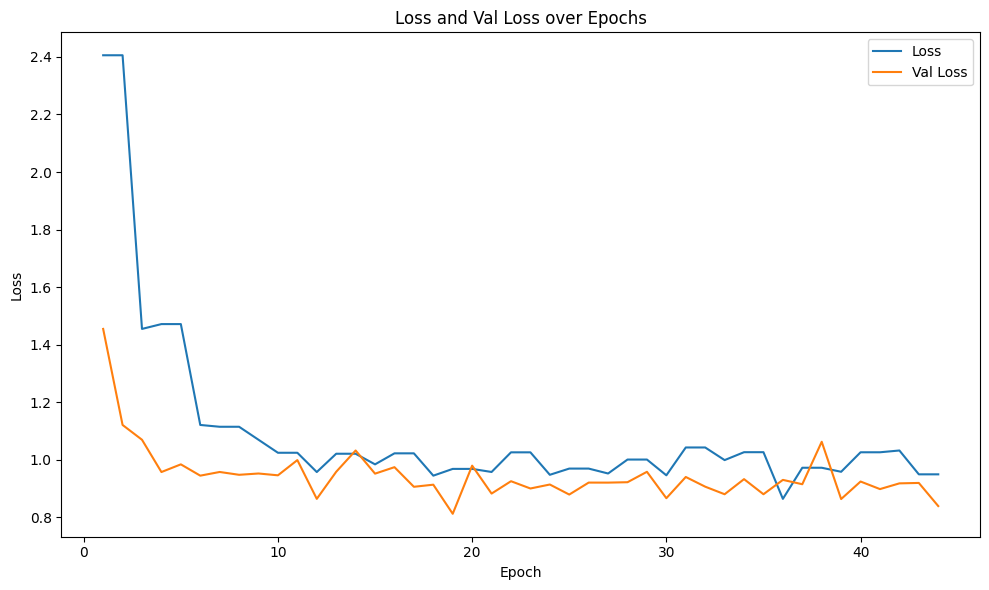

In [78]:
plt.figure(figsize=(10, 6))

# Plot loss
plt.plot(epochs, losses, label='Loss')

# Plot val_loss
plt.plot(epochs, val_losses, label='Val Loss')

# Set labels and title
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss and Val Loss over Epochs')

# Add legend
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()

In [79]:
bert_text_model.load_weights(CHECKPOINT_IELTS_PATH)

In [80]:
test_labels_ielts.value_counts()

score
6.0    39
7.0    38
6.5    37
5.5    27
7.5    21
8.0    20
5.0    16
8.5     6
9.0     5
4.5     3
4.0     2
3.5     1
Name: count, dtype: int64

In [84]:
test_loss_ielts, test_MAE_ielts, r2_ielts, rmse_ielts = bert_text_model.evaluate(
    test_generator_ielts, 
    steps=len(test_data_ielts) // BATCH_SIZE_IELTS
)

print("Test MSE:", test_loss_ielts)
print("TEST MAE:", test_MAE_ielts)
print("Test r2:", r2_ielts)
print("TEST RMSE:", rmse_ielts)

13/13 [==============================] - 16s 242ms/step - loss: 0.9240 - mean_absolute_error: 0.6943 - r2_score: 0.2139 - rmse: 0.8385
Test MSE: 0.9240016341209412
TEST MAE: 0.6942983865737915
Test r2: 0.21389946341514587
TEST RMSE: 0.8384746313095093


There was no noticeable transfer of knowledge